In [48]:
import pandas as pd
import glob as glob
import numpy as np
import seaborn as sns
import matplotlib as plt
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)


In [49]:
sense6 = pd.read_csv('6Sense Web Data.csv')
sense6['url'] = sense6['url'].astype('str').str.lower()
sense6['domain'] = sense6['domain'].astype('str').str.lower()

sense6.sample(5)

,name,country,domain,url,visiteddate,DateRange
5433858,DIMENSIONDATA,People's Republic of China,dimensiondata.com,https://www.sailpoint.com/zh-tw/?elqct=website&elqchannel=organicdirect,2020-07-03,last14days
5139463,SAILPOINT,United States,sailpoint.com,https://www.sailpoint.com/identity-library/2-minutes-to-certification-completion/?elqct=website&elqchannel=organicdirect&elqcta=search,2020-06-05,last14days
3134572,CMEGROUP,Singapore,cmegroup.com,https://www.sailpoint.com/identity-library/identity-and-access-management/,2019-12-10,last14days
2293199,DILIGENTBOARDS,United States,diligent.com,https://www.sailpoint.com/integrations/okta/?elqct=website&elqchannel=organicdirect,2019-10-25,last14days
2372116,STATESTREET,India,ssga.com,https://www.sailpoint.com/,2019-10-18,last14days


In [50]:
#sense6 = sense6[sense6['visiteddate'] > '2020-03-01']
sense6.groupby('visiteddate')['domain'].nunique()


visiteddate
2019-04-02    1715
2019-04-03    1509
2019-04-04    1371
2019-04-05    1151
2019-04-06     370
              ... 
2020-07-08    1124
2020-07-09    1080
2020-07-10     814
2020-07-11     256
2020-07-12     276
Name: domain, Length: 451, dtype: int64

In [51]:
adwords = pd.read_csv('Search keyword Reportv2.csv',skiprows=2)
adwords['Campaign'] = adwords['Campaign'].astype('str').str.lower()
adwords['Ad group'] = adwords['Ad group'].astype('str').str.lower()
adwords['Query'] = adwords['Search keyword'].astype('str').str.lower()
adwords.sample(5)

,Search keyword,Search keyword status,Search keyword match type,Campaign,Campaign status,Ad group,Keyword max CPC,Currency,Keyword/Placement,Start date,End date,Clicks,Impressions,CTR,Avg. CPC,Cost,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. rate,Avg. CPM,Query
16507,company data protection,Campaign paused,Broad,data access governance - broad,Campaign paused,data governance broad whitepaper,20.00,USD,company data protection,2016-05-11,--,0,78,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,company data protection
6227,+hipaa +network +security,Campaign paused,Broad,sem_int_en_nb_bmm_healthcare,Campaign paused,hipaa compliance,1.75,USD,+hipaa +network +security,2019-04-15,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+hipaa +network +security
32209,gartner magic quadrant for identity governance and administration 2019,Campaign paused,Exact,sem_usa_en_nb_exact_id-gov,Campaign paused,gartner,8.00,USD,gartner magic quadrant for identity governance and administration 2019,2018-05-06,--,0,2,0.00%,0.0,0.00,0.00%,50.00%,0.0,0,0.00,0.00%,0.00,gartner magic quadrant for identity governance and administration 2019
27840,+gestion +des +comptes +à +privilèges +gartner +magic +quadrant,Low search volume,Broad,sem_emea_fr_nb_bmm_gartner,Eligible,gartner-privileged-account-management,3.17,USD,+gestion +des +comptes +à +privilèges +gartner +magic +quadrant,2019-01-10,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+gestion +des +comptes +à +privilèges +gartner +magic +quadrant
25505,active directory account types,Eligible,Phrase,iam_emea_en,Campaign budget constrained,competitors-microsoft_phrase,11.00,USD,active directory account types,2020-08-12,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,active directory account types


In [52]:
adwords.groupby('Campaign')['Start date'].nunique()
### Cool only one campaign here HOORAY

Campaign
3rd-party-access_ams_en                                           1
3rd-party-access_apac_en                                          1
3rd-party-access_emea_en                                          1
access control - search                                           1
access management - apac                                          1
                                                                 ..
user provisioning - europe                                        1
when identity meets data - search (competitor keyword varonis)    1
zero-trust_ams_en                                                 1
zero-trust_apac_en                                                1
zero-trust_emea_en                                                1
Name: Start date, Length: 248, dtype: int64

In [53]:
### Campaign in adwords has topic, geo, and language
#### Campaign in 6sense has topic, geo, language, and ad group and query?

### Aug 2020 ex: iam_apac_en
### Adword Campaign[0] = topic
### Adword Campaign [1] = geo
### Adword Campaign [2] = language
### Adword AdGroup[0] = Ad Group
### Adword AdGroup[1] = Targeting Strategy


#### Adword < Aug 2020 ex: sem_usa_en_br_phrase
### Adword Campaign[0] = sem (just drop it)
### Adwords Campaign[1] = geo (region -- usa vs. int vs apac)
### Adwords Campaign[2] = language
### Adwords Campaign[3] = br = brand; nb = not brand?
### Adwords Campaign[4] = Targeting Strategy
### Adwords Campaign[5] = Topic (if exists)
### Adwords Campaign[6+] = Catchall
### Adwords Adgroup = Folder style names (Identity, Navigate, etc.) -- keyword?
### Adwords Query should match to keyword in 6sense after Campaign 1-5 
### (it's the very last thing after the last underscore in the 6 sense)

#### Before 2020: 


In [54]:
len(adwords['Campaign'].str.contains('sem_'))


38843

In [55]:
adwords['Start date'] = pd.to_datetime(adwords['Start date'])


In [56]:
adwords[(adwords['Start date'] > '2020-04-01')].sort_values(by='Start date',ascending=True)


,Search keyword,Search keyword status,Search keyword match type,Campaign,Campaign status,Ad group,Keyword max CPC,Currency,Keyword/Placement,Start date,End date,Clicks,Impressions,CTR,Avg. CPC,Cost,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. rate,Avg. CPM,Query
38842,cisco live global conference,Low search volume,Phrase,sem_usa_en_nb_phrase_events,Eligible,cisco live,3.0,USD,cisco live global conference,2020-04-21,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,cisco live global conference
7061,emtech asia,Low quality score,Exact,sem_apac_en_nb_exact_events,Eligible,emtech,3.5,USD,emtech asia,2020-04-21,--,0,2,0.00%,0.00,0.00,50.00%,100.00%,0.0,0,0.00,0.00%,0.00,emtech asia
2652,+cisco +live +global +2020,Low search volume,Broad,sem_apac_en_nb_bmm_events,Eligible,cisco live,2.5,USD,+cisco +live +global +2020,2020-04-21,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+cisco +live +global +2020
22634,cisco live global australia,Low search volume,Phrase,sem_usa_en_nb_phrase_events,Eligible,cisco live,3.0,USD,cisco live global australia,2020-04-21,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,cisco live global australia
22620,emtech 2020,Eligible,Phrase,sem_usa_en_nb_phrase_events,Eligible,emtech,3.0,USD,emtech 2020,2020-04-21,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,emtech 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,salesforce saml,Low quality score,Exact,authentication_ams_en,Campaign budget constrained,competitors-sfdc_exact,13.0,USD,salesforce saml,2020-08-12,--,0,10,0.00%,0.00,0.00,0.00%,80.00%,0.0,0,0.00,0.00%,0.00,salesforce saml
13433,best authentication as a service providers,Eligible,Phrase,authentication_ams_en,Campaign budget constrained,general_phrase,11.0,USD,best authentication as a service providers,2020-08-12,--,0,1,0.00%,0.00,0.00,100.00%,100.00%,0.0,0,0.00,0.00%,0.00,best authentication as a service providers
13434,authentication mechanism,Low quality score,Phrase,authentication_ams_en,Campaign budget constrained,general_phrase,11.0,USD,authentication mechanism,2020-08-12,--,15,443,3.39%,9.34,140.14,69.98%,80.14%,0.0,0,0.00,0.00%,316.34,authentication mechanism
13442,cloud zero trust,Below first page bid,Phrase,zero-trust_ams_en,Eligible,general_phrase,11.0,USD,cloud zero trust,2020-08-12,--,0,7,0.00%,0.00,0.00,0.00%,28.57%,0.0,0,0.00,0.00%,0.00,cloud zero trust


# # Spot check to see if things are in both

In [57]:
adwords[adwords['Campaign'].str.contains('int_en_nb_bmm_events')]

,Search keyword,Search keyword status,Search keyword match type,Campaign,Campaign status,Ad group,Keyword max CPC,Currency,Keyword/Placement,Start date,End date,Clicks,Impressions,CTR,Avg. CPC,Cost,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. rate,Avg. CPM,Query
328,+cisco +live +global +2021,Low search volume,Broad,sem_int_en_nb_bmm_events,Eligible,cisco live,2.5,USD,+cisco +live +global +2021,2020-04-21,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+cisco +live +global +2021
367,+cisco +live +events,Below first page bid,Broad,sem_int_en_nb_bmm_events,Eligible,cisco live,2.5,USD,+cisco +live +events,2020-04-21,--,0,3,0.00%,0.0,0.00,0.00%,66.67%,0.0,0,0.00,0.00%,0.00,+cisco +live +events
847,+rsa +asia,Eligible,Broad,sem_int_en_nb_bmm_events,Eligible,rsa,2.5,USD,+rsa +asia,2020-04-21,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+rsa +asia
954,+impact +seminar,Below first page bid,Broad,sem_int_en_nb_bmm_events,Eligible,impact,2.5,USD,+impact +seminar,2020-04-21,--,0,1,0.00%,0.0,0.00,100.00%,100.00%,0.0,0,0.00,0.00%,0.00,+impact +seminar
1285,+impact +summit,Below first page bid,Broad,sem_int_en_nb_bmm_events,Eligible,impact,2.5,USD,+impact +summit,2020-04-21,--,0,1,0.00%,0.0,0.00,100.00%,100.00%,0.0,0,0.00,0.00%,0.00,+impact +summit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37962,+fsisac +summit,Eligible,Broad,sem_int_en_nb_bmm_events,Eligible,fs-isac summit,2.5,USD,+fsisac +summit,2020-04-21,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+fsisac +summit
38281,+emtech +asia +seminar,Low search volume,Broad,sem_int_en_nb_bmm_events,Eligible,emtech,2.5,USD,+emtech +asia +seminar,2020-04-21,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+emtech +asia +seminar
38507,+acsc +2021,Eligible,Broad,sem_int_en_nb_bmm_events,Eligible,acsc,2.5,USD,+acsc +2021,2020-04-21,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+acsc +2021
38635,+emtech +asia,Eligible,Broad,sem_int_en_nb_bmm_events,Eligible,emtech,2.5,USD,+emtech +asia,2020-04-21,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+emtech +asia


In [58]:
sense6[sense6['url'].astype('str').str.contains('int_en_nb_bmm_events')]

,name,country,domain,url,visiteddate,DateRange
4675770,GCS,United States,nan,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_cisco_live_global_2021,2020-04-22,last14days
4675772,GCS,United States,nan,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_cisco_live_global_melbourne,2020-04-22,last14days
4730701,NEWMANUNIV,United States,newmanu.edu,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_cisco_live_global_2021,2020-04-22,last14days
4768862,GCS,United States,nan,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_cisco_live_global_2021,2020-04-22,last14days
4768864,GCS,United States,nan,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_cisco_live_global_melbourne,2020-04-22,last14days
4865972,NaN,Canada,mts.net,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_secure_world&gclid=cjwkcajwwyp2brbgeiwakobpai1lrk0dbonmmhrouuzponkfdovdbbj0lejdd9en9cdrba2s_tiqqhoccs0qavd_bwe,2020-05-17,last14days
4959896,NaN,Canada,mts.net,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_secure_world&gclid=cjwkcajwwyp2brbgeiwakobpai1lrk0dbonmmhrouuzponkfdovdbbj0lejdd9en9cdrba2s_tiqqhoccs0qavd_bwe,2020-05-17,last14days
5160475,ARUBAHPE,South Africa,hpe.com,https://www.sailpoint.com/events/digital-events-hub/?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_impact_2020&gclid=cj0kcqjww_f2brc-arisap3zarecdjusuvntm68nrl3k-tfzhvdgunsj7zybfmbdralafwf0l8wsva4aalvgealw_wcb,2020-06-09,last14days
5160476,ARUBAHPE,South Africa,hpe.com,https://info.sailpoint.com/sp_uniform_eventswebinars?elqoffer=wb_successfulma_0520&slsbackup=20-q2-sps-ww-m&acampaign-webinar-sp&elqcampaignidbackup=2965&submittext=reg&elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_impact_2020&gclid=cj0kcqjww_f2brc-arisap3zarecdjusuvntm68nrl3k-tfzhvdgunsj7zybfmbdralafwf0l8wsva4aalvgealw_wcb&elqcta=digital-events-hub,2020-06-09,last14days
5160477,ARUBAHPE,South Africa,hpe.com,https://info.sailpoint.com/webinar-best-practices-successful-merger-acquisition?elqct=paidmedia&elqchannel=googlesearch_int_en_nb_bmm_events_impact_2020&gclid=cj0kcqjww_f2brc-arisap3zarecdjusuvntm68nrl3k-tfzhvdgunsj7zybfmbdralafwf0l8wsva4aalvgealw_wcb&elqcta=digital-events-hub,2020-06-09,last14days


### Break apart adwords campaigns

In [68]:
adwords = adwords[adwords['Start date'] > '2018-01-01'].reset_index(drop=True)


In [86]:
adwords['Campaign'].str.contains('sem_')[34473]


True

In [95]:
### Break in to SEM and non-SEM
SEM = adwords[adwords['Campaign'].str.contains('sem_')].reset_index(drop=True)
SEM['Geo']=SEM['Campaign'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else '')
SEM['Language'] = SEM['Campaign'].apply(lambda x: x.split('_')[2] if len(x.split('_')) > 2 else '')
SEM['Brand'] = SEM['Campaign'].apply(lambda x: x.split('_')[3] if len(x.split('_')) > 3 else '')
SEM['TargetingStrategy'] = SEM['Campaign'].apply(lambda x: x.split('_')[4] if len(x.split('_')) > 4 else '')
SEM['Topic'] = SEM['Campaign'].apply(lambda x: x.split('_')[5] if len(x.split('_')) > 5 else '')
SEM['Catchall'] = SEM['Campaign'].apply(lambda x: x.split('_')[6:] if len(x.split('_')) > 6 else '')
SEM.sample()

,Search keyword,Search keyword status,Search keyword match type,Campaign,Campaign status,Ad group,Keyword max CPC,Currency,Keyword/Placement,Start date,End date,Clicks,Impressions,CTR,Avg. CPC,Cost,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. rate,Avg. CPM,Query,Geo,Language,Brand,TargetingStrategy,Topic,Catchall
1923,secure access management system,Campaign paused,Phrase,sem_usa_en_nb_phrase_id-gov,Campaign paused,secure-access-management,8.0,USD,secure access management system,2018-05-06,--,12,278,4.32%,11.82,141.79,35.32%,89.29%,0.0,0,0.00,0.00%,510.04,secure access management system,usa,en,nb,phrase,id-gov,


In [97]:
### NonSEM
NonSEM = adwords[~adwords['Campaign'].str.contains('sem_')].reset_index(drop=True)
NonSEM['Topic']=NonSEM['Campaign'].apply(lambda x: x.split('_')[0] if len(x.split('_')) > 0 else '')
NonSEM['Geo']=NonSEM['Campaign'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else '')
NonSEM['Language']=NonSEM['Campaign'].apply(lambda x: x.split('_')[2] if len(x.split('_')) > 2 else '')
NonSEM['TargetingStrategy']=NonSEM['Ad group'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else '')
NonSEM.sample()

,Search keyword,Search keyword status,Search keyword match type,Campaign,Campaign status,Ad group,Keyword max CPC,Currency,Keyword/Placement,Start date,End date,Clicks,Impressions,CTR,Avg. CPC,Cost,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. rate,Avg. CPM,Query,Geo,Language,Brand,TargetingStrategy,Topic,Catchall
14210,powershell active directory commands,Eligible,Phrase,iam_ams_en,Campaign budget constrained,competitors-microsoft_phrase,11.0,USD,powershell active directory commands,2020-08-12,--,0,0,0.00%,0.0,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,powershell active directory commands,ams,en,,phrase,iam,


In [102]:
dfs =[SEM,NonSEM]
adwords = pd.concat(dfs)


### Split into the SEM and non SEM
adwords['Geo'] = ""
adwords['Language'] = ""
adwords['Brand'] = ""
adwords['TargetingStrategy'] = ""
adwords['Topic'] = ""
adwords['Catchall'] = ""
for i in range(0,len(adwords)):
    if adwords['Campaign'].str.contains('sem_')[i]:
        adwords['Geo'][i] = adwords['Campaign'].astype('str').str.split('_')[i][1]
        adwords['Language'][i] = adwords['Campaign'].astype('str').str.split('_')[i][2]
        adwords['Brand'][i] = adwords['Campaign'].astype('str').str.split('_')[i][3]
        if len(adwords['Campaign'].astype('str').str.split('_')[i]) > 4:
            adwords['TargetingStrategy'][i] = adwords['Campaign'].astype('str').str.split('_')[i][4]
            if len(adwords['Campaign'].astype('str').str.split('_')[i]) > 5:
                adwords['Topic'][i] = adwords['Campaign'].astype('str').str.split('_')[i][5]
                if len(adwords['Campaign'].astype('str').str.split('_')[i]) > 6:
                    adwords['Catchall'][i] = adwords['Campaign'].astype('str').str.split('_')[i][6:]  
    else:
        adwords['Topic'][i] = adwords['Campaign'].astype('str').str.split('_')[i][0]
        if len(adwords['Campaign'].astype('str').str.split('_')[i]) > 1:
            adwords['Geo'][i] = adwords['Campaign'].astype('str').str.split('_')[i][1]
            if len(adwords['Campaign'].astype('str').str.split('_')[i]) > 2:
                adwords['Language'][i] = adwords['Campaign'].astype('str').str.split('_')[i][2]
        if len(adwords['Ad group'].astype('str').str.split('_')[i]) > 1:
            adwords['TargetingStrategy'][i] = adwords['Ad group'].astype('str').str.split('_')[i][1]
        

In [107]:
adwords[adwords['Topic']==""]

,Search keyword,Search keyword status,Search keyword match type,Campaign,Campaign status,Ad group,Keyword max CPC,Currency,Keyword/Placement,Start date,End date,Clicks,Impressions,CTR,Avg. CPC,Cost,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,View-through conv.,Cost / conv.,Conv. rate,Avg. CPM,Query,Geo,Language,Brand,TargetingStrategy,Topic,Catchall,CleanCampaign
9,+iiq +sailpoint,Campaign paused,Broad,sem_apac_en_br_bmm,Campaign paused,identityiq,4.28,USD,+iiq +sailpoint,2018-10-24,--,29,579,5.01%,2.59,75.14,86.36%,88.26%,0.0,0,0.00,0.00%,129.78,+iiq +sailpoint,apac,en,br,bmm,,,
10,sailpoint features,Campaign paused,Phrase,sem_usa_en_br_phrase,Campaign paused,features,2.84,USD,sailpoint features,2018-05-06,--,14,87,16.09%,4.98,69.73,57.50%,88.75%,0.0,0,0.00,0.00%,801.49,sailpoint features,usa,en,br,phrase,,,
11,+sailpoint +identity +management,Campaign paused,Broad,sem_int_en_br_bmm,Campaign paused,identity-management,4.28,USD,+sailpoint +identity +management,2018-10-15,--,9,109,8.26%,3.51,31.61,47.71%,77.98%,0.0,0,0.00,0.00%,290.00,+sailpoint +identity +management,int,en,br,bmm,,,
15,+sailpoint +products +for +iam,Campaign paused,Broad,sem_int_en_br_bmm,Campaign paused,identity-access-management,4.28,USD,+sailpoint +products +for +iam,2018-10-15,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+sailpoint +products +for +iam,int,en,br,bmm,,,
25,+sailpoint +audit +capabilities,Campaign paused,Broad,sem_apac_en_br_bmm,Campaign paused,auditing,4.28,USD,+sailpoint +audit +capabilities,2018-10-24,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+sailpoint +audit +capabilities,apac,en,br,bmm,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19166,sailpoint identityiq,Campaign paused,Exact,sem_int_en_br_exact,Campaign paused,identityiq,4.50,USD,sailpoint identityiq,2018-10-15,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,sailpoint identityiq,int,en,br,exact,,,
19167,how sailpoint identityiq is in the market,Campaign paused,Exact,sem_int_en_br_exact,Campaign paused,identityiq,5.17,USD,how sailpoint identityiq is in the market,2018-10-15,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,how sailpoint identityiq is in the market,int,en,br,exact,,,
19184,navigate apac,Campaign paused,Exact,sem_apac_en_br_exact,Campaign paused,navigate,3.50,USD,navigate apac,2018-10-24,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,navigate apac,apac,en,br,exact,,,
19193,+sailpoint +in +us,Campaign paused,Broad,sem_apac_en_br_bmm,Campaign paused,brand,3.73,USD,+sailpoint +in +us,2018-10-24,--,0,0,0.00%,0.00,0.00,0.00%,0.00%,0.0,0,0.00,0.00%,0.00,+sailpoint +in +us,apac,en,br,bmm,,,


In [121]:
##### Make a new uniform campaign
Topic=adwords[adwords['Topic']!=""].reset_index(drop=True)
NTopic = adwords[adwords['Topic']==""].reset_index(drop=True)
Topic['CleanCampaign']=Topic['Topic']+'_'+Topic['Geo']+'_'+Topic['Language']
NTopic['CleanCampaign'] = NTopic['Geo']+'_'+NTopic['Language']
dfs=[Topic,NTopic]
adwords=pd.concat(dfs).reset_index(drop=True)
adwords.sample(10)

,0,Ad group,Avg. CPC,Avg. CPM,Brand,CTR,Campaign,Campaign status,Catchall,CleanCampaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Currency,End date,Geo,Impr. (Abs. Top) %,Impr. (Top) %,Impressions,Keyword max CPC,Keyword/Placement,Language,Query,Search keyword,Search keyword match type,Search keyword status,Start date,TargetingStrategy,Topic,View-through conv.
29894,NaN,general_bmm,0.0,0.00,,0.00%,onboarding-offboarding_emea_en,Eligible,,onboarding-offboarding_emea_en,0,0.00%,0.0,0.00,0.00,USD,--,emea,0.00%,0.00%,2,9.00,+user +account +lifecycle +management,en,+user +account +lifecycle +management,+user +account +lifecycle +management,Broad,Eligible,2020-08-12,bmm,onboarding-offboarding,0.0
21174,NaN,general_exact,0.0,0.00,,0.00%,authentication_apac_en,Campaign budget constrained,,authentication_apac_en,0,0.00%,0.0,0.00,0.00,USD,--,apac,0.00%,0.00%,0,13.00,demo saml service provider,en,demo saml service provider,demo saml service provider,Exact,Eligible,2020-08-12,exact,authentication,0.0
28153,NaN,competitors-microsoft_phrase,0.0,0.00,,0.00%,iam_ams_en,Campaign budget constrained,,iam_ams_en,0,0.00%,0.0,0.00,0.00,USD,--,ams,0.00%,0.00%,0,11.00,windows azure ad module for windows powershell,en,windows azure ad module for windows powershell,windows azure ad module for windows powershell,Phrase,Below first page bid,2020-08-12,phrase,iam,0.0
7903,NaN,gdpr,0.0,0.00,nb,0.00%,sem_ww_en_nb_rtg_bmm_gdpr,Campaign paused,[gdpr],bmm_ww_en,0,0.00%,0.0,0.00,0.00,USD,--,ww,0.00%,0.00%,0,8.00,+gdpr +law,en,+gdpr +law,+gdpr +law,Broad,Campaign paused,2020-02-10,rtg,bmm,0.0
11949,NaN,identity-management,0.0,0.00,nb,0.00%,sem_int_es_nb_phrase_id-gov,Campaign paused,,id-gov_int_es,0,0.00%,0.0,0.00,0.00,USD,--,int,0.00%,0.00%,0,10.00,suite de gestión de identidad,es,suite de gestión de identidad,suite de gestión de identidad,Phrase,Campaign paused,2019-01-10,phrase,id-gov,0.0
23907,NaN,general_phrase,0.0,0.00,,0.00%,iam_apac_en,Campaign budget constrained,,iam_apac_en,0,0.00%,0.0,0.00,0.00,USD,--,apac,0.00%,0.00%,0,11.00,identify management and single sign on systems,en,identify management and single sign on systems,identify management and single sign on systems,Phrase,Eligible,2020-08-12,phrase,iam,0.0
31398,NaN,gartner_bmm,0.0,0.00,,0.00%,pam_emea_en,Eligible,,pam_emea_en,0,0.00%,0.0,0.00,0.00,USD,--,emea,0.00%,0.00%,0,9.00,+gartner +privileged +access +management +2019,en,+gartner +privileged +access +management +2019,+gartner +privileged +access +management +2019,Broad,Eligible,2020-08-12,bmm,pam,0.0
15062,NaN,gartner,0.0,0.00,nb,0.00%,sem_int_en_nb_exact_okta,Campaign paused,,okta_int_en,0,0.00%,0.0,0.00,0.00,USD,--,int,0.00%,0.00%,0,3.83,okta magic quadrant,en,okta magic quadrant,okta magic quadrant,Exact,Campaign paused,2020-02-11,exact,okta,0.0
12222,NaN,it-governance,0.0,0.00,nb,0.00%,sem_ww_en_nb_rtg_bmm_id-gov,Campaign paused,[id-gov],bmm_ww_en,0,0.00%,0.0,0.00,0.00,USD,--,ww,0.00%,0.00%,0,8.00,+it +governance +frameworks,en,+it +governance +frameworks,+it +governance +frameworks,Broad,Campaign paused,2020-02-10,rtg,bmm,0.0
28407,NaN,secure-identity-management,0.0,0.00,,0.00%,sp_g_apac_nb_phrase_id-gov,Campaign paused,,sp_g_apac,0,0.00%,0.0,0.00,0.00,USD,--,g,7.69%,61.54%,13,13.33,security and identity management,apac,security and identity management,security and identity management,Phrase,Campaign paused,2018-10-24,,sp,0.0


In [122]:
#### Looks like 'ww' is a geo we need to look at
adwords.groupby('Geo')['Geo'].nunique()

Geo
        1
ams     1
apac    1
emea    1
g       1
int     1
usa     1
ww      1
Name: Geo, dtype: int64

## Break apart 6 sense campaigns

In [139]:
### Only take rows that are search
Sense6Search = sense6[(sense6['url'].astype('str').str.contains('search')) & (sense6['url'].astype('str').str.contains('='))].reset_index(drop=True)
Sense6Search.sample(5)

,name,country,domain,url,visiteddate,DateRange
211286,AURORACANNABIS,Canada,auroramj.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_int-en-br-exact_sailpoint&gclid=eaiaiqobchmi-oep7vep5qivb56fch2qrazaeaayasaaegino_d_bwe,2019-10-09,last14days
103701,VCE,United States,nan,https://www.sailpoint.com/identity-library/cloud-security/?elqct=paidmedia&elqchannel=googlesearch_usa-en-nb-phrase-id-gov_cloud-computing-security&gclid=eaiaiqobchmivc7h2ize4wivzf_jbx1wdqn3eaayasaaegiaqpd_bwe,2019-07-31,last14days
28893,OHIOSTATEUNIVERSITY,United States,osu.edu,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cj0kcqjwt_nmbrd0arisajys6o1r4l46yvug_bogkmtyb0dfbimpqfoliruyx5-lse1zjqvib5mgacsaanypealw_wcb,2019-05-17,last14days
15090,CATECH,United States,ca.com,https://www.sailpoint.com/identity-library/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cj0kcqjw5j_mbrdvarisagqglzaljsk5mht6mv-vkcoj5htwypjyktphreuwoyfo_skqgg0tlquum5caamlbealw_wcb,2019-04-30,last14days
258993,SAP,Netherlands,sap.com,https://www.content.sailpoint.com/gartner-magic-quadrant-for-iga/?elqct=paidmedia&elqchannel=googlesearch_int-en-nb-phrase-gartner_quadrant-magic-gartner&gclid=cj0kcqjwr-_tbrcmarisan413wqamldqam_yon5kavnp42z37qzjegoz2ukpkidqw6gg-405whm-8maaanp7ealw_wcb,2019-11-01,last14days


In [140]:
print("{:.2f}% of 6 Sense records retained.".format(100*len(Sense6Search)/len(sense6)))


8.79% of 6 Sense records retained.


In [141]:
Sense6Search[['junk','Placeholder']]=Sense6Search.url.str.split('search',n=1,expand=True)
Sense6Search[['Placeholder','junk']]=Sense6Search.Placeholder.str.split('&',n=1,expand=True)
Sense6Search['Placeholder'] = Sense6Search['Placeholder'].str.lstrip('_')
Sense6Search['Placeholder'] = Sense6Search['Placeholder'].str.lower()
Sense6Search=Sense6Search.drop(['junk'],axis=1)
Sense6Search.sample(5)   

,name,country,domain,url,visiteddate,DateRange,Placeholder
451402,ZIONSBANCORPORATION,United States,zionsbancorporation.com,https://www.sailpoint.com/solutions/separation-of-duties/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmipk7y3ppa6qivt_dach0wjqlreaayasaaegig2fd_bwe,2020-05-19,last14days,usa-en-br-exact_sailpoint
249013,NaN,United States,homeaway.com,https://www.sailpoint.com/company/accolades/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cj0kcqjwr-_tbrcmarisan413wtt3r1-_deu4lt5oeutm12orvhlj6hoxsy00pe_bodyfiohbnxcioqaahoxealw_wcb,2019-11-01,last14days,usa-en-br-exact_sailpoint
388381,SAILPOINTTECH,United States,sailpoint.com,https://www.sailpoint.com/?elqct=website&elqchannel=organicdirect&elqcta=search,2020-03-23,last14days,
44505,BIOIQ,United States,bioiq.com,https://www.sailpoint.com/demo/?elqct=paidmedia&elqchannel=bingsearch_usa-tm-exact-tm_sailpoint&elqcta=header,2019-06-10,last14days,usa-tm-exact-tm_sailpoint
414966,NaN,United States,opal.dev,https://www.sailpoint.com/solutions/access-request/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-phrase_sailpoint-features&gclid=cj0kcqjw4dr0brcxarisakunjwrkoumo1hp435dcv1nbkyzujpmgssn8f6sm2ui0kn3-ywq5aylhu5eaakucealw_wcb,2020-04-16,last14days,usa-en-br-phrase_sailpoint-features


In [142]:
### How many rows contained Search in URL but nothing in campaign now?
print("{:.2f}% of rows do not have a campaign string available.".format(100*len(Sense6Search[Sense6Search['Placeholder'] == ""])/len(Sense6Search)))
print("{:.2f}% of rows that do not have a campaign string are organic direct.".format(100*len(Sense6Search[(Sense6Search['Placeholder'] == "") & (Sense6Search['url'].str.contains('organicdirect'))])/len(Sense6Search[Sense6Search['Placeholder'] == ""])))



7.74% of rows do not have a campaign string available.
96.43% of rows that do not have a campaign string are organic direct.


In [143]:
### Who are the ones that are not organic direct?
Sense6Search[(Sense6Search['Placeholder'] == "") & (~Sense6Search['url'].str.contains('organicdirect',case=False))]

,name,country,domain,url,visiteddate,DateRange,Placeholder
1241,SANTANDERCONSUMERBANK,Germany,santander.de,"https://translate.googleusercontent.com/translate_c?depth=1&hl=de&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/products/identitynow/&xid=17259,15700021,15700043,15700186,15700191,15700253&usg=alkjrhgslwm9f4hgs9jnfolvzlmc2tjnma",2019-04-04,last14days,
2006,MCAFEE,United States,mcafee.com,"https://translate.googleusercontent.com/translate_c?depth=1&hl=ja&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/&xid=17259,15700022,15700186,15700191,15700253&usg=alkjrhgu3_7hvljxqcuwah2zzaxppgeu2w",2019-04-03,last14days,
7597,AMBROGIOSRL,Italy,nan,"https://translate.googleusercontent.com/translate_c?depth=1&hl=it&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/&xid=17259,15700023,15700186,15700191,15700253&usg=alkjrhimvr5pl4kmc7miberwkzdty_bc4q",2019-04-04,last14days,
7598,AMBROGIOSRL,Italy,nan,"https://translate.googleusercontent.com/translate_c?depth=1&hl=it&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/&xid=17259,15700023,15700186,15700191,15700253&usg=alkjrhimvr5pl4kmc7miberwkzdty_bc4q",2019-04-04,last14days,
7599,AMBROGIOSRL,Italy,nan,"https://translate.googleusercontent.com/translate_c?depth=1&hl=it&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/&xid=17259,15700023,15700186,15700191,15700253&usg=alkjrhimvr5pl4kmc7miberwkzdty_bc4q",2019-04-04,last14days,
...,...,...,...,...,...,...,...
485620,住友金属鉱山株式会社,Japan,smm.co.jp,https://translate.googleusercontent.com/translate_c?depth=1&hl=ja&prev=search&pto=aue&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/identity-for/remote-workforce/&usg=alkjrhjgmpgv5if-cti0x3gahevfbpvd1w,2020-06-24,last14days,
485621,住友金属鉱山株式会社,Japan,smm.co.jp,https://translate.googleusercontent.com/translate_c?depth=1&hl=ja&prev=search&pto=aue&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/solutions/cloud-governance/&usg=alkjrhjgcqqja-zu7dh50wpblcwahsyfvg,2020-06-29,last14days,
485622,住友金属鉱山株式会社,Japan,smm.co.jp,https://translate.googleusercontent.com/translate_c?depth=1&hl=ja&prev=search&pto=aue&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/solutions/cloud-governance/&usg=alkjrhjgcqqja-zu7dh50wpblcwahsyfvg,2020-06-29,last14days,
486238,OPENSAS,France,open-groupe.com,https://translate.googleusercontent.com/translate_c?depth=1&hl=fr&prev=search&pto=aue&rurl=translate.google.com&sl=en&sp=nmt4&u=https://www.sailpoint.com/&usg=alkjrhhqcpfvhwwvg6pskerm2dqjftu1qw,2020-07-07,last14days,


In [144]:
print("{:.2f}% of the rows that do not have a campaign string and are not organic direct are from google translate".format(100*len(Sense6Search[(Sense6Search['Placeholder'] == "") & (~Sense6Search['url'].str.contains('organicdirect',case=False))& (Sense6Search['url'].str.contains('translate',case=False))])/len(Sense6Search[(Sense6Search['Placeholder'] == "") & (~Sense6Search['url'].str.contains('organicdirect',case=False))])))

90.55% of the rows that do not have a campaign string and are not organic direct are from google translate


In [145]:
len(Sense6Search[(Sense6Search['Placeholder'] == "") & (~Sense6Search['url'].str.contains('organicdirect',case=False))& (Sense6Search['url'].str.contains('translate',case=False))])

1217

In [146]:
### Where elqct = website and channel = organic direct, that is a search and they clicked (not from a paid ad)
Sense6Search[(Sense6Search['Placeholder'] == "") & (Sense6Search['url'].str.contains('organicdirect',case=False))]

,name,country,domain,url,visiteddate,DateRange,Placeholder
157,SailPoint Technologies,United States,sailpoint.com,https://www.sailpoint.com/identity-library/the-role-of-identity-governance-in-securing-access-to-files/?elqct=website&elqchannel=organicdirect&elqcta=search,2019-04-12,last14days,
158,SailPoint Technologies,United States,sailpoint.com,https://www.sailpoint.com/identity-library/governing-access-to-data-stored-in-files/?elqct=website&elqchannel=organicdirect&elqcta=search,2019-04-12,last14days,
159,SailPoint Technologies,United States,sailpoint.com,https://www.sailpoint.com/blog/privileged-account-management-meets-identity-governance/?elqct=website&elqchannel=organicdirect&elqcta=search,2019-04-11,last14days,
160,SailPoint Technologies,United States,sailpoint.com,https://www.sailpoint.com/identity-library/identity-at-scale/?elqct=website&elqchannel=organicdirect&elqcta=search,2019-04-11,last14days,
161,SailPoint Technologies,United States,sailpoint.com,https://www.sailpoint.com/identity-library/governing-access-to-data-stored-in-files/?elqct=website&elqchannel=organicdirect&elqcta=search,2019-04-11,last14days,
...,...,...,...,...,...,...,...
486883,SAILPOINTTECH,United States,sailpoint.com,https://www.sailpoint.com/legal/?elqct=website&elqchannel=organicdirect&elqcta=search,2020-07-06,last14days,
486884,FEDEX,United States,fedex.com,https://www.sailpoint.com/blog/identityiq-6-1/?elqct=website&elqchannel=organicdirect&elqcta=search,2020-07-02,last14days,
486885,ABNAMROBANK,Netherlands,abnamro.com,https://www.sailpoint.com/identity-library/take-a-zero-trust-approach-to-security/?elqct=website&elqchannel=organicdirect&elqcta=search,2020-06-30,last14days,
486886,ABNAMROBANK,Netherlands,abnamro.com,https://www.sailpoint.com/identity-library/take-a-zero-trust-approach-to-security/?elqct=website&elqchannel=organicdirect&elqcta=search,2020-06-30,last14days,


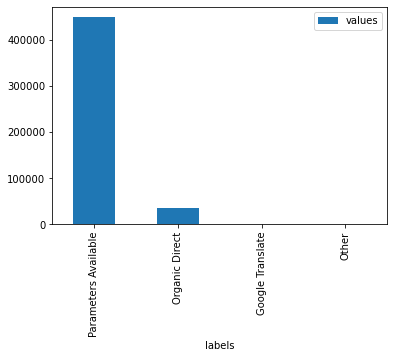

In [147]:
### let's get some context of jus thow many we're looking at here before we go much farther
search6barchart = pd.DataFrame({'labels':['Parameters Available','Organic Direct','Google Translate','Other'],'values':[len(Sense6Search[Sense6Search['Placeholder'] != ""]),len(Sense6Search[(Sense6Search['Placeholder'] == "") & (Sense6Search['url'].str.contains('organicdirect'))]),len(Sense6Search[(Sense6Search['Placeholder'] == "") & (~Sense6Search['url'].str.contains('organicdirect',case=False))& (Sense6Search['url'].str.contains('translate',case=False))]),len(Sense6Search[(Sense6Search['Placeholder'] == "") & (~Sense6Search['url'].str.contains('organicdirect',case=False))& (Sense6Search['url'].str.contains('translate',case=False))])]})
ax = search6barchart.plot.bar(x="labels",y="values")                                  

In [148]:
### Create a separate DF for organic direct and drop the rest
OrganicDirect = Sense6Search[(Sense6Search['Placeholder'] == "") & (Sense6Search['url'].str.contains('organicdirect'))].reset_index(drop=True)
Sense6Search = Sense6Search[(Sense6Search['Placeholder'] != "")& (~Sense6Search['url'].str.contains('organicdirect'))]


In [149]:
Sense6Search.sample(10)


,name,country,domain,url,visiteddate,DateRange,Placeholder
140229,BLUEWOLFONDEMANDORG,United States,bluewolf.com,https://www.sailpoint.com/blog/an-identity-moon-shot/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmiyitbg6sz5aivkadsch1vxwaoeaayayaaeglpbpd_bwe,2019-09-03,last14days,usa-en-br-exact_sailpoint
199314,DELTAAIRLINES,United States,delta.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cj0kcqjw8svsbrdqarisahkvyqfh_f3nvufdh-8xxtb0gmu0p2xcfaavmyqs5qe9hcz3xkbqapipivgaahf5ealw_wcb,2019-10-01,last14days,usa-en-br-exact_sailpoint
31686,PINELLASCOUNTY,United States,pinellascounty.org,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmio6kfz8qg4giv10snch2wzw1ueaayasaaeglgafd_bwe,2019-05-16,last14days,usa-en-br-exact_sailpoint
296555,SMARTCOMMUNICATIONS,Philippines,smart.com.ph,https://www.sailpoint.com/identity-library/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=bingsearch_apac-nb-phrase-id-gov_cloud-computing-security&elqcta=gmq-overlay,2019-12-05,last14days,apac-nb-phrase-id-gov_cloud-computing-security
298170,UNIVERSITYOFTEXASATAUSTIN,United States,nan,https://www.sailpoint.com/identity-library/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-phrase_sailpoint-technologies&gclid=cjwkcaia27lvbrb0eiwapc8xwdsx9b4pavciyrghi4jqmnxuxfao0r-e6rmvnam8arvvhmgv0r-cyhocv3mqavd_bwe&elqcta=home,2019-12-08,last14days,usa-en-br-phrase_sailpoint-technologies
98690,ADVENTONE,Australia,adventone.com,https://www.sailpoint.com/identity-score-report/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-exact_sailpoint&gclid=cjwkcajw4nrpbrbseiwauclcdmz6lvkvsxpqdjypk9equpyjavx7607iyldpqx2el8-jsq59onbyfhocwj8qavd_bwe&elqcta=home,2019-07-24,last14days,apac-en-br-exact_sailpoint
256971,FEDERALHOMELOANMORTGAGE,United States,freddiemac.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi07py-p_c5qivcjyzch0msgd6eaayasaaegjil_d_bwe,2019-10-29,last14days,usa-en-br-exact_sailpoint
285630,ACCENTURE,United States,accenture.com,https://www.sailpoint.com/identity-library/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cj0kcqia2b7ubrdsarisaee9xpeom0u6mftmavakdj9qcyfj2qblsuxvwsibw_toa0nyd0tw3rmlmc4aakpvealw_wcb,2019-11-17,last14days,sitelink_identity-library
267424,DNVGL,Norway,dnvgl.com,https://www.content.sailpoint.com/gartner-magic-quadrant-for-iga/?elqct=paidmedia&elqchannel=googlesearch_int-en-nb-phrase-gartner_gartner-access-management&gclid=cjwkcaiazanubrazeiwa5yf4ulesknsuahtsmyoela00ubyctkojgwnk7mrviqhyvyc_sta0p8oweroclgqqavd_bwe,2019-11-12,last14days,int-en-nb-phrase-gartner_gartner-access-management
421718,FORDMOTOR,United States,ford.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-phrase_sailpoint-technologies&gclid=cj0kcqjws_r0brcwarisamxfdrjtedp5wci4ntknsztokvducrolrd_wt7cghqdspig6wm6751mqcb0aarihealw_wcb,2020-04-21,last14days,usa-en-br-phrase_sailpoint-technologies


In [150]:
Sense6Search['Underscores']=Sense6Search.apply(lambda x: x['Placeholder'].count('_'), axis=1)
Sense6Search['Hyphens']=Sense6Search.apply(lambda x: x['Placeholder'].count('-'), axis=1)

In [151]:
Sense6Search['month'] = pd.DatetimeIndex(Sense6Search['visiteddate']).month.astype('str') + '_' + pd.DatetimeIndex(Sense6Search['visiteddate']).year.astype('str')


In [152]:
Sense6Search.groupby(['month','Hyphens'])['domain'].count().reset_index().sort_values(by='domain',ascending=False)


,month,Hyphens,domain
3,10_2019,3,26001
158,9_2019,3,24576
146,8_2019,3,19503
15,11_2019,3,18860
84,5_2019,3,17620
...,...,...,...
71,4_2019,10,2
46,2_2020,2,2
125,7_2019,2,2
95,5_2020,2,2


In [153]:
### reset the index just to be safe
Sense6Search=Sense6Search.reset_index(drop=True)
Sense6Search.sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month
299823,AKAMAITECH,United States,akamai.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmijlsy_5va5givd4fabr3tnqcxeaayasaaegiksfd_bwe,2019-12-18,last14days,usa-en-br-exact_sailpoint,1,3,12_2019
132273,NTTDATA,United States,nttdata.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cjwkcajwzjjrbrbveiwa867byhcyfrwrfe1h1ebxuyedmgftthfds4bfcmyi7f4hf29bor1tydreehocnteqavd_bwe,2019-08-28,last14days,usa-en-br-exact_sailpoint,1,3,8_2019
2591,PRINCESSCRUISES,United States,princess.com,https://www.sailpoint.com/products/identityiq/?elqct=paidmedia&elqchannel=bingsearch_usa-tm-exact-tm_how-sailpoint-identityiq-is-in-the-market&elqcta=home,2019-04-08,last14days,usa-tm-exact-tm_how-sailpoint-identityiq-is-in-the-market,1,9,4_2019
247340,RIUHOTELS,Spain,riu.com,https://www.sailpoint.com/es/company/team/?elqct=paidmedia&elqchannel=googlesearch_int_es_br_exact_sailpoint&gclid=eaiaiqobchmixsafhp_i5qivs0htch3riqb7eaayasaaeglxzfd_bwe,2019-11-11,last14days,int_es_br_exact_sailpoint,4,0,11_2019
29416,ROMERO,United States,romerocorporation.com,https://www.sailpoint.com/products/identityiq/?elqct=paidmedia&elqchannel=bingsearch_usa-tm-exact-tm_sailpoint-access-certification,2019-05-23,last14days,usa-tm-exact-tm_sailpoint-access-certification,1,5,5_2019
152126,GOVTECH,Singapore,tech.gov.sg,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-exact_sailpoint&gclid=cj0kcqjwzozsbrcnarisaem9kboaoicui2posbqt3awi1zwvdqxrpzshbsmiecepvkoydab_g52-slqaahtiealw_wcb,2019-09-20,last14days,apac-en-br-exact_sailpoint,1,3,9_2019
167234,NTUCINCOME,Singapore,income.com.sg,https://www.sailpoint.com/solutions/identitynow/?elqct=paidmedia&elqchannel=bingsearch_apac-nb-phrase-id-gov_cloud-governance-tools,2019-09-26,last14days,apac-nb-phrase-id-gov_cloud-governance-tools,1,6,9_2019
142776,CENTRIFY,United Kingdom,centrify.com,https://www.sailpoint.com/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=googlesearch_int-en-nb-bmm-gartner_iam-gartner-magic-quadrant&gclid=eaiaiqobchmi9drbvkvg5aivb7ltch0l6a3aeaayaiaaegjnl_d_bwe,2019-09-10,last14days,int-en-nb-bmm-gartner_iam-gartner-magic-quadrant,1,7,9_2019
264220,FRANCETELECOM,France,francetelecom.fr,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqiainnubrd3arisam8kmltezz5brtd0hbrpl8eduojy6oe4qc_oblpazjhusxg2who-asetkogaajg4ealw_wcb,2019-11-21,last14days,sitelink_sailpoint-solutions,1,1,11_2019
219883,NaN,United States,prudential.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=bingsearch_usa-tm-exact-tm_sailpoint,2019-10-19,last14days,usa-tm-exact-tm_sailpoint,1,3,10_2019


In [154]:
#### Attempt to just break it out one way and then see what happens
Sense6Search['Brand'] = ""
Sense6Search['TargetingStrategy'] = ""
Sense6Search['Topic'] = ""
Sense6Search['Catchall'] = ""
Sense6Search['Keyword'] = ""
### Break on hyphens
Sense6Search[['Geo','Language','Brand','TargetingStrategy','Catchall']]=Sense6Search.Placeholder.str.split('-',n=4,expand=True)
### split targeting stategy into strategy and topic
Sense6Search[['TargetingStrategy','Keyword']] = Sense6Search.TargetingStrategy.str.split('_',n=1,expand=True)
### Get Correct Keyword
Sense6Search['junk2']=Sense6Search['Placeholder'].str.split('_')
Sense6Search['Keyword']=Sense6Search['Keyword'].mask(Sense6Search['Underscores'] < Sense6Search['Hyphens'],Sense6Search.apply(lambda x: x['junk2'][x['Underscores']],axis=1))
Sense6Search=Sense6Search.drop('junk2',axis=1)

Sense6Search.sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand,TargetingStrategy,Topic,Catchall,Keyword,Geo,Language
254402,INGBANK,Australia,ingdirect.com.au,https://www.sailpoint.com/blog/page/2/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-phrase_sailpoint-iiq&gclid=eaiaiqobchmiha7y_md15qivxxwrch3kba8meaayasaaegjmdvd_bwe,2019-11-19,last14days,apac-en-br-phrase_sailpoint-iiq,1,4,11_2019,br,phrase,,iiq,sailpoint-iiq,apac,en
83997,FAIRFAXMEDIA,Australia,fairfaxmedia.com.au,https://www.sailpoint.com/solutions/identityiq/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-bmm_sailpoint-identityiq&gclid=eaiaiqobchmi3qjuh_i44wivbg4rch2cpq0beaayasaaegjbhfd_bwe,2019-07-16,last14days,apac-en-br-bmm_sailpoint-identityiq,1,4,7_2019,br,bmm,,identityiq,sailpoint-identityiq,apac,en
213240,NSSLABS,United States,nsslabs.com,https://www.sailpoint.com/company/team/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cj0kcqjwl8xtbrdaarisakfwtxdkiypeiwqoy2tqzs6dif-xhbdnq2cmbalrfptyhj9ceehb35oqta0aaswvealw_wcb,2019-10-24,last14days,usa-en-br-exact_sailpoint,1,3,10_2019,br,exact,,None,sailpoint,usa,en
369380,BAPTISTHEALTHCARESYSTEM,United States,bhsi.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi5rg8uvtn6aivenvach0vjgueeaayasaaegkc7pd_bwe,2020-04-14,last14days,usa-en-br-exact_sailpoint,1,3,4_2020,br,exact,,None,sailpoint,usa,en
414118,BRIGHTTALK,Singapore,brighttalk.com,https://www.sailpoint.com/identity-library/webinars/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-exact_sailpoint&gclid=eaiaiqobchmilc3xqqbq6qivr6awch1dqqcaeaayasaaegiwe_d_bwe,2020-05-26,last14days,apac-en-br-exact_sailpoint,1,3,5_2020,br,exact,,None,sailpoint,apac,en
393379,SINGAPOREUNIVOFSOCIALSCI,Singapore,sim.edu.sg,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-phrase_sailpoint-technologies&gclid=cjwkcajwkun1braieiwa2mjrwwevtkjeg35kbu-txwhmq02-c-hmui4lyicb3kfuhkhyr5hlyagqdxocoakqavd_bwe,2020-05-12,last14days,apac-en-br-phrase_sailpoint-technologies,1,4,5_2020,br,phrase,,technologies,sailpoint-technologies,apac,en
334078,ROGERSCOMMUNICATIONS,Canada,nan,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_int-en-br-exact_sailpoint&gclid=eaiaiqobchmilrwy2jcb6aivbnvach1hvwateaayasaaegljwpd_bwe,2020-03-04,last14days,int-en-br-exact_sailpoint,1,3,3_2020,br,exact,,None,sailpoint,int,en
308269,CAMDENPROPERTYTRUST,United States,camdenliving.com,https://www.sailpoint.com/integrations/amazon-web-services/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi_ps7vllr5wivbdvach3-kwd4eaayasaaegjfipd_bwe,2020-02-14,last14days,usa-en-br-exact_sailpoint,1,3,2_2020,br,exact,,None,sailpoint,usa,en
146327,DELL,United States,dell.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint-technology&gclid=cjwkcajwq4fsbrbneiwantahcfthzsbwxalbmigo-wovxj1yf7b6gg-vrbkznn_96ux7abqglpxwlbocnp0qavd_bwe,2019-09-18,last14days,usa-en-br-exact_sailpoint-technology,1,4,9_2019,br,exact,,technology,sailpoint-technology,usa,en
207563,PHILIPS,People's Republic of China,philips.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_apac-en-br-exact_sailpoint&gclid=cj0kcqjwoqdtbrd-arisal4pvidtwl6x4qvmozxvble_rfywivbr-2tqoyhiqquizyt1xdgjpazvdqqaasndealw_wcb,2019-10-17,last14days,apac-en-br-exact_sailpoint,1,3,10_2019,br,exact,,None,sailpoint,apac,en


In [155]:
### Break out Underscores #### THIS WORKS
### Geo
Sense6Search['junk']=""
Sense6Search['Geo']=Sense6Search['Geo'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search.Placeholder.str.split('_',n=1))
Sense6Search['junk']=Sense6Search['junk'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['Geo'].str[1])
Sense6Search['Geo']=Sense6Search['Geo'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['Geo'].str[0])

### Language
Sense6Search['Language']=Sense6Search['Language'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search.junk.str.split('_',n=1))
Sense6Search['junk']=Sense6Search['junk'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['Language'].str[1])
Sense6Search['Language']=Sense6Search['Language'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['Language'].str[0])

### Brand
Sense6Search['Brand']=Sense6Search['Brand'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search.junk.str.split('_',n=1))
Sense6Search['junk']=Sense6Search['junk'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['Brand'].str[1])
Sense6Search['Brand']=Sense6Search['Brand'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['Brand'].str[0])

### TargetingStrategy
Sense6Search['TargetingStrategy']=Sense6Search['TargetingStrategy'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search.junk.str.split('_',n=1))
Sense6Search['Keyword']=Sense6Search['Keyword'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['TargetingStrategy'].str[1])
Sense6Search['TargetingStrategy']=Sense6Search['TargetingStrategy'].mask(Sense6Search['Underscores'] > Sense6Search['Hyphens'],Sense6Search['TargetingStrategy'].str[0])
Sense6Search=Sense6Search.drop('junk',axis=1)

### Test to make sure underscores are good
Sense6Search[Sense6Search['Underscores'] > Sense6Search['Hyphens']].sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand,TargetingStrategy,Topic,Catchall,Keyword,Geo,Language
279855,SCOPELEC,France,groupe-scopelec.fr,https://www.content.sailpoint.com/fr-gartnermq?elqct=paidmedia&elqchannel=googlesearch_int_fr_br_exact_sailpoint&gclid=cjwkcaiais3vbrbdeiwahxb29apdnsw4ee370eeizxkj8idlu5-twcild-drobzky4pkg4pai6qnzrocmpeqavd_bwe,2019-12-13,last14days,int_fr_br_exact_sailpoint,4,0,12_2019,br,exact,,None,sailpoint,int,fr
56631,SAILPOINT,France,sailpoint.com,https://www.sailpoint.com/fr/identity-management-solutions/?elqct=paidmedia&elqchannel=googlesearch_int_fr_br_phrase_sailpoint&gclid=eaiaiqobchmi-lyjgozw4givaojvch2s_qlieaayasaaeglqrvd_bwe,2019-06-17,last14days,int_fr_br_phrase_sailpoint,4,0,6_2019,br,phrase,,None,sailpoint,int,fr
191225,TED,France,ecldirect.fr,https://www.sailpoint.com/solutions/access-request/?elqct=paidmedia&elqchannel=googlesearch_int_fr_br_phrase_sailpoint&gclid=eaiaiqobchmiqjklkcgh5qiv04jvch0soa6zeaayaiaaegkwb_d_bwe,2019-10-06,last14days,int_fr_br_phrase_sailpoint,4,0,10_2019,br,phrase,,None,sailpoint,int,fr
157866,BIOMERIEUX,France,biomerieux.com,https://www.sailpoint.com/fr/solutions/identitynow/?elqct=paidmedia&elqchannel=googlesearch_int_fr_br_phrase_sailpoint-identityiq&gclid=eaiaiqobchmizknrrfzc5aivcldtch3x_g72eaayasaaegidl_d_bwe,2019-09-19,last14days,int_fr_br_phrase_sailpoint-identityiq,4,1,9_2019,br,phrase,,None,sailpoint-identityiq,int,fr
49936,KPMG,Spain,kpmg.es,https://www.sailpoint.com/es/identity-library/identity-governance/?elqct=paidmedia&elqchannel=googlesearch_int_es_br_phrase_sailpoint&gclid=eaiaiqobchmiwj-gq-zo4givwer3ch0icavpeaayasaaegikdvd_bwe,2019-06-14,last14days,int_es_br_phrase_sailpoint,4,0,6_2019,br,phrase,,None,sailpoint,int,es
21689,NaN,France,aduneo.com,https://www.sailpoint.com/fr/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=googlesearch_int_fr_br_exact_sailpoint&gclid=cjwkcajwq-tmbrbdeiwaao1enwz4nvu4p9fwtzci14wletmv13597tjj7chw4jjkslrv9dggkpht-boc7keqavd_bwe,2019-05-13,last14days,int_fr_br_exact_sailpoint,4,0,5_2019,br,exact,,None,sailpoint,int,fr
88884,EXEVI,Spain,exevi.com,https://www.sailpoint.com/es/identity-library/identity-governance/?elqct=paidmedia&elqchannel=googlesearch_int_es_br_phrase_sailpoint&gclid=cj0kcqjw_r3nbrdxarisajljlegokwqosvynbzjhjfz9m7x9k_2pfzsi13a7m5na5ql03mpwao-cmlqaatixealw_wcb,2019-07-31,last14days,int_es_br_phrase_sailpoint,4,0,7_2019,br,phrase,,None,sailpoint,int,es
49921,KPMG,Spain,kpmg.es,https://www.sailpoint.com/es/identity-library/identity-governance/?elqct=paidmedia&elqchannel=googlesearch_int_es_br_phrase_sailpoint&gclid=eaiaiqobchmiwj-gq-zo4givwer3ch0icavpeaayasaaegikdvd_bwe,2019-06-14,last14days,int_es_br_phrase_sailpoint,4,0,6_2019,br,phrase,,None,sailpoint,int,es
289383,UNIVERSIDADPOPULARAUTONOMADELESTADODEPUEBLAAC,Mexico,upaep.mx,https://www.sailpoint.com/es/company/?elqct=paidmedia&elqchannel=googlesearch_int_es_br_phrase_sailpoint&gclid=cj0kcqia89zvbrdoarisaoiepbcersxfbz4kx9arl4fhhukupbryb9u-ys_bi4eozujzgq4vvtkwfsoaaulnealw_wcb,2019-12-16,last14days,int_es_br_phrase_sailpoint,4,0,12_2019,br,phrase,,None,sailpoint,int,es
182689,VDVNETWORKSSADECV,Mexico,vdvnetworks.com,https://www.sailpoint.com/es/identity-library/video-gallery/?elqct=paidmedia&elqchannel=googlesearch_int_es_br_phrase_sailpoint&gclid=cj0kcqjw8svsbrdqarisahkvyqempzdaykdhdftlfvfjy_cstgjs5ni-zews4ekoor9wpbuwrt9ljskaaswtealw_wcb,2019-10-01,last14days,int_es_br_phrase_sailpoint,4,0,10_2019,br,phrase,,None,sailpoint,int,es


In [156]:
### Break out Sitelink searches
Sense6Search['Geo'] = Sense6Search['Geo'].mask(Sense6Search['Placeholder'].str.contains('sitelink'),"")
Sense6Search['Language'] = Sense6Search['Language'].mask(Sense6Search['Placeholder'].str.contains('sitelink'),"")
Sense6Search['Brand'] = Sense6Search['Brand'].mask(Sense6Search['Placeholder'].str.contains('sitelink'),"")

### split targeting stategy into strategy and topic
Sense6Search['junk2']=""
Sense6Search['junk2']=Sense6Search['Placeholder'].str.split('_')
Sense6Search['TargetingStrategy']=Sense6Search['TargetingStrategy'].mask(Sense6Search['Placeholder'].str.contains('sitelink'),Sense6Search['junk2'].str[0])
Sense6Search['Keyword']=Sense6Search['Keyword'].mask(Sense6Search['Placeholder'].str.contains('sitelink'),Sense6Search['junk2'].str[1])
Sense6Search=Sense6Search.drop('junk2',axis=1)

Sense6Search[Sense6Search['Placeholder'].str.contains('sitelink')].sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand,TargetingStrategy,Topic,Catchall,Keyword,Geo,Language
53421,AMERICANADVISORSGROUP,United States,aag.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=eaiaiqobchmips-x2q3q4givlonkch0gjw3-eaayasabegllnvd_bwe,2019-06-04,last14days,sitelink_sailpoint-solutions,1,1,6_2019,,sitelink,,None,sailpoint-solutions,,
424326,REDBRICK,United States,redbrickrestaurants.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=eaiaiqobchmi_8ao9yhz6qiv6r-tbh3d4aafeaayasabegjg-fd_bwe,2020-06-08,last14days,sitelink_sailpoint-solutions,1,1,6_2020,,sitelink,,None,sailpoint-solutions,,
114501,UNITYMEDIABW,Germany,unitymedia.de,https://www.sailpoint.com/demo/?elqct=paidmedia&elqchannel=googlesearch_sitelink_live-demo&gclid=eaiaiqobchmi7pptg8ae5aivlroych2fgg58eaayasadegimbvd_bwe,2019-08-15,last14days,sitelink_live-demo,1,1,8_2019,,sitelink,,None,live-demo,,
405876,SWINERTON,United States,swinerton.com,https://www.sailpoint.com/identity-library/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cjwkcajw5ij2brbdeiwa0frc9btsgv0-pmec_l6ixcbagzbheatrlswiq92n29cs4ytowkycqgkivxocci4qavd_bwe,2020-05-18,last14days,sitelink_identity-library,1,1,5_2020,,sitelink,,None,identity-library,,
296557,APPIA,United States,digitalturbine.com,https://info.sailpoint.com/sp_uniform_contactusdemorequest?elqoffer=contactus&slsbackup=sps-all-website-contactusform-0414&elqcampaignidbackup=12&submittext=s&elqct=paidmedia&elqchannel=googlesearch_sitelink_contact-sailpoint&gclid=cjwkcaia58fvbrazeiwaqw-hzx8kje0fwn0-dfycfxvtsded_zfmcya8br6thagxdtllo0cflp_s2rocs5iqavd_bwe,2019-12-12,last14days,sitelink_contact-sailpoint,1,1,12_2019,,sitelink,,None,contact-sailpoint,,
153233,NaN,United States,rowe-media.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cjwkcajwk93rbrbleiwacmapuac67uvzlqypmilkbza8rbyhrd4pai6sxfhlipwfxvet6ime5qfkgrocvteqavd_bwe,2019-09-10,last14days,sitelink_sailpoint-solutions,1,1,9_2019,,sitelink,,None,sailpoint-solutions,,
202265,QBE,United States,qbe.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqjw3jxtbrc8arisaebhg4nfwk-hgfib91gmztrgekah6dnnuviyxzp5sokpyszfofrtt8nkfzuaast-ealw_wcb,2019-10-15,last14days,sitelink_sailpoint-solutions,1,1,10_2019,,sitelink,,None,sailpoint-solutions,,
327249,WOLTERSKLUWER,United States,wolterskluwer.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqiaqnpybrcjarisaka-wfzjhlcai9s6kg37tqchqqj9rphsv1y18wwdis5-ziofno7imkv0q3kaaj-sealw_wcb,2020-02-25,last14days,sitelink_sailpoint-solutions,1,1,2_2020,,sitelink,,None,sailpoint-solutions,,
401823,SWINERTON,United States,swinerton.com,https://www.sailpoint.com/identity-library/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cjwkcajw5ij2brbdeiwa0frc9btsgv0-pmec_l6ixcbagzbheatrlswiq92n29cs4ytowkycqgkivxocci4qavd_bwe,2020-05-18,last14days,sitelink_identity-library,1,1,5_2020,,sitelink,,None,identity-library,,
216088,NaN,Philippines,aboitiz.com,https://www.sailpoint.com/solutions/access-certification/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqjwrrxtbrckarisambu6bgh-gigbliicg0a7al5kg9twu4xdrf1ra8q5-42r-nitcpjlkfvufeaarq6ealw_wcb,2019-10-21,last14days,sitelink_sailpoint-solutions,1,1,10_2019,,sitelink,,None,sailpoint-solutions,,


In [157]:
print("{:.2f}% of the data set are sitelink URLs.".format(100*len(Sense6Search[Sense6Search['url'].str.contains('sitelink')])/len(Sense6Search)))

8.67% of the data set are sitelink URLs.


In [158]:
Sense6Search[Sense6Search['Placeholder'].str.contains('sitelink')]['month'].value_counts()

5_2020     10775
10_2019     3307
6_2019      2765
9_2019      2645
8_2019      2623
5_2019      2508
11_2019     2501
12_2019     2338
4_2020      2041
3_2020      1615
6_2020      1571
2_2020      1217
7_2019      1047
4_2019       944
1_2020        78
7_2020        12
Name: month, dtype: int64

# Create Clean Campaign

In [159]:
### Build clean campaign
Sense6Search['CleanCampaign'] =  Sense6Search['Geo']+ '_' + Sense6Search['Language']+'_'+Sense6Search['Brand']+'_'+Sense6Search['TargetingStrategy']
Sense6Search['CleanCampaign'] = Sense6Search['CleanCampaign'].mask(Sense6Search['Placeholder'].str.contains('sitelink'),Sense6Search['Keyword']+'_'+Sense6Search['TargetingStrategy'])
Sense6Search.sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand,TargetingStrategy,Topic,Catchall,Keyword,Geo,Language,CleanCampaign
39848,ZILLIONTECH,United States,zilliontechnologies.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi-6prjt3v4givfivich0hiq8deaayasaaegj78_d_bwe,2019-06-06,last14days,usa-en-br-exact_sailpoint,1,3,6_2019,br,exact,,None,sailpoint,usa,en,usa_en_br_exact
56095,DELEKUS,United States,delekus.com,https://www.sailpoint.com/integrations/office365/?elqct=paidmedia&elqchannel=bingsearch_usa-tm-exact-tm_sailpoint,2019-06-11,last14days,usa-tm-exact-tm_sailpoint,1,3,6_2019,exact,tm,,None,sailpoint,usa,tm,usa_tm_exact_tm
16822,CREDIBLE,United States,credible.com,https://www.sailpoint.com/company/team/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi1rxahvgo4give9vkch0ndgeceaayasaaegkdu_d_bwe,2019-05-09,last14days,usa-en-br-exact_sailpoint,1,3,5_2019,br,exact,,None,sailpoint,usa,en,usa_en_br_exact
126005,FUTUREFUND,Australia,futurefund.gov.au,https://www.sailpoint.com/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=googlesearch_apac-en-nb-phrase-gartner_idm-gartner&gclid=eaiaiqobchmimdx-pqgz5aivzyrwch0m2gsfeaayaiaaegjl7vd_bwe,2019-09-02,last14days,apac-en-nb-phrase-gartner_idm-gartner,1,5,9_2019,nb,phrase,,gartner_idm-gartner,idm-gartner,apac,en,apac_en_nb_phrase
87949,AMERICANFAMILYINS,United States,amfam.com,https://www.sailpoint.com/solutions/identityiq/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-phrase_sailpoint-iiq&gclid=cjwkcajw1f_pbraeeiwapp0jkecrjltyynfkfppwmt3q9br1czq4soafbajldfhubb5qypp6wcm3qbocwteqavd_bwe,2019-07-30,last14days,usa-en-br-phrase_sailpoint-iiq,1,4,7_2019,br,phrase,,iiq,sailpoint-iiq,usa,en,usa_en_br_phrase
168707,BIOMET,United States,biomet.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cj0kcqjwljfsbrduarisaidhswr52geh42m8rdnvtrvdbyqc8vlg0cfbvq-o_li-xrs_c0skc0vmdwqaaoccealw_wcb,2019-09-22,last14days,usa-en-br-exact_sailpoint,1,3,9_2019,br,exact,,None,sailpoint,usa,en,usa_en_br_exact
205470,NaN,United States,level3.com,https://www.sailpoint.com/identity-library/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=googlesearch_usa-en-nb-phrase-gartner_gartner-it-services&gclid=eaiaiqobchmi8o6kxbap5qivdr7ach0pva2aeaayasaaeglcxvd_bwe,2019-10-09,last14days,usa-en-nb-phrase-gartner_gartner-it-services,1,6,10_2019,nb,phrase,,gartner_gartner-it-services,gartner-it-services,usa,en,usa_en_nb_phrase
99578,G4SCORPORATESERVICES,United Kingdom,g4s.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=bingsearch_int-nb-phrase-id-gov_cloud-security-services,2019-08-01,last14days,int-nb-phrase-id-gov_cloud-security-services,1,6,8_2019,phrase,id,,gov_cloud-security-services,cloud-security-services,int,nb,int_nb_phrase_id
258610,NaN,Philippines,vitarich.com,https://www.sailpoint.com/identity-library/cloud-security/?elqct=paidmedia&elqchannel=bingsearch_apac-nb-phrase-id-gov_cloud-computing-security,2019-11-20,last14days,apac-nb-phrase-id-gov_cloud-computing-security,1,6,11_2019,phrase,id,,gov_cloud-computing-security,cloud-computing-security,apac,nb,apac_nb_phrase_id
417990,IDENTROPY,United States,identropy.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmiui-a-97x6qivetbach2e7apoeaayasaaegimwvd_bwe,2020-05-28,last14days,usa-en-br-exact_sailpoint,1,3,5_2020,br,exact,,None,sailpoint,usa,en,usa_en_br_exact


In [160]:
### check on the sitelink problem children
Sense6Search[Sense6Search['Placeholder'].str.contains('sitelink')].sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand,TargetingStrategy,Topic,Catchall,Keyword,Geo,Language,CleanCampaign
398433,TIMEWARNERCABLEENTERPRISES,United States,timewarnercable.com,https://www.sailpoint.com/identity-library/identity-governance-leader-gartner-magic-quadrant/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=eaiaiqobchminmunxpfk6qivbk7ich1_2gq9eaayasabegjfr_d_bwe&elqcta=gmq-overlay,2020-05-23,last14days,sitelink_identity-library,1,1,5_2020,,sitelink,,None,identity-library,,,identity-library_sitelink
58104,PWC,United States,pwc.com,https://www.sailpoint.com/solutions/access-certification/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=eaiaiqobchmi5_6u4mr24givjz6fch33eqiteaayasabegi33_d_bwe,2019-06-19,last14days,sitelink_sailpoint-solutions,1,1,6_2019,,sitelink,,None,sailpoint-solutions,,,sailpoint-solutions_sitelink
193179,INFOR,United States,infor.com,https://www.sailpoint.com/company/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=eaiaiqobchmi1zbc86r-5aivrf_jbx1bza1seaayasabegkttpd_bwe,2019-10-02,last14days,sitelink_sailpoint-solutions,1,1,10_2019,,sitelink,,None,sailpoint-solutions,,,sailpoint-solutions_sitelink
405064,SWINERTON,United States,swinerton.com,https://www.sailpoint.com/identity-library/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cjwkcajw5ij2brbdeiwa0frc9btsgv0-pmec_l6ixcbagzbheatrlswiq92n29cs4ytowkycqgkivxocci4qavd_bwe,2020-05-18,last14days,sitelink_identity-library,1,1,5_2020,,sitelink,,None,identity-library,,,identity-library_sitelink
309207,CHILDRENSHOSPITALOFWI,United States,chw.org,https://www.sailpoint.com/identity-library/video-gallery/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqia-bjybrccarisafbowg2jl594gy53n9mcz-lc-rg3dcy0zqwaqdaeciv_ol_td_wakpsf9jsaamxgealw_wcb,2020-02-20,last14days,sitelink_sailpoint-solutions,1,1,2_2020,,sitelink,,None,sailpoint-solutions,,,sailpoint-solutions_sitelink
55486,DELOITTE,Australia,deloitte.com.au,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=eaiaiqobchmiuprb3qbl4givlw4rch253quqeaayasabegkbcpd_bwe,2019-06-13,last14days,sitelink_sailpoint-solutions,1,1,6_2019,,sitelink,,None,sailpoint-solutions,,,sailpoint-solutions_sitelink
318189,NaN,Australia,nsw.gov.au,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqia1-3ybrcmarisan7b4h2zy-hdc2thdkt8wlca0mtmsoyt4ocuswhjt1zabhh2lxm_v9ikxnkaaprdealw_wcb,2020-03-01,last14days,sitelink_sailpoint-solutions,1,1,3_2020,,sitelink,,None,sailpoint-solutions,,,sailpoint-solutions_sitelink
135840,SAILPOINTTECH,United States,sailpoint.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_sitelink_sailpoint-solutions&gclid=cj0kcqjw_ozrbrdmarisaaidq_jmr2pyrp9ufmh0jtkooglguul52kk8uwrpgsxusdcc620fx82o7piaatdpealw_wcb,2019-09-13,last14days,sitelink_sailpoint-solutions,1,1,9_2019,,sitelink,,None,sailpoint-solutions,,,sailpoint-solutions_sitelink
110076,SEMPRAENERGY,United States,semprautilities.com,https://www.sailpoint.com/security/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cj0kcqjw4s7qbrczarisaimcaxzrhcunzq_lnwbbswecdwqycdx90m4nj3r8dekcu_lln7ixnfhahpoaatqrealw_wcb,2019-08-14,last14days,sitelink_identity-library,1,1,8_2019,,sitelink,,None,identity-library,,,identity-library_sitelink
402797,SWINERTON,United States,swinerton.com,https://www.sailpoint.com/identity-library/?elqct=paidmedia&elqchannel=googlesearch_sitelink_identity-library&gclid=cjwkcajw5ij2brbdeiwa0frc9btsgv0-pmec_l6ixcbagzbheatrlswiq92n29cs4ytowkycqgkivxocci4qavd_bwe,2020-05-18,last14days,sitelink_identity-library,1,1,5_2020,,sitelink,,None,identity-library,,,identity-library_sitelink


# Any random extra problem children before the match?

In [161]:
### looks like it
Sense6Search.groupby('Geo')['domain'].nunique().reset_index()
### These Geos are problem children

,Geo,domain
0,,2517
1,.+tigerit+provides+end,1
2,.com,1
3,/?elqct=paidmedia,1
4,/?q=google%2b,1
...,...,...
69,site5.7.64%20tenantattributionlink_sailpoint,1
70,usa,10523
71,usa_en_nb_bmm_id,1
72,usa_en_nb_exact_id,9


In [162]:
Sense6Search[Sense6Search['Geo'] == 'usrapid7a']

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand,TargetingStrategy,Topic,Catchall,Keyword,Geo,Language,CleanCampaign
377521,WELLINGTONMGMT,United States,wellington.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usrapid7a-en-br-exact_sailpoint&gclid=eaiaiqobchmih67wsccb6qivk4cfch2sxalreaayasaaegiiypd_bwe,2020-04-24,last14days,usrapid7a-en-br-exact_sailpoint,1,3,4_2020,br,exact,,None,sailpoint,usrapid7a,en,usrapid7a_en_br_exact
384614,WELLINGTONMGMT,United States,wellington.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usrapid7a-en-br-exact_sailpoint&gclid=eaiaiqobchmih67wsccb6qivk4cfch2sxalreaayasaaegiiypd_bwe,2020-04-24,last14days,usrapid7a-en-br-exact_sailpoint,1,3,4_2020,br,exact,,None,sailpoint,usrapid7a,en,usrapid7a_en_br_exact


In [163]:

### change "Topic" to "Keyword"
### If googlesearch_int-en-nb-phrase-gartner_quadrant-magic-gartner for example, 'Quadrant-magic-gartner' is the keyword. 
### so just take everything after the final '_'

### Go ahead and remove the '-' or '_' from keywords to make the matching easier with adwords



# Try to make a match?


In [164]:
### Adwords New Match Column
#adwords['CleanCampaign']=adwords['Geo']+'_'+adwords['Language']+'_'+adwords['Brand']+'_'+adwords['TargetingStrategy']


In [165]:
adwords.sample(10)


,0,Ad group,Avg. CPC,Avg. CPM,Brand,CTR,Campaign,Campaign status,Catchall,CleanCampaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Currency,End date,Geo,Impr. (Abs. Top) %,Impr. (Top) %,Impressions,Keyword max CPC,Keyword/Placement,Language,Query,Search keyword,Search keyword match type,Search keyword status,Start date,TargetingStrategy,Topic,View-through conv.
27000,NaN,general_bmm,0.00,0.00,,0.00%,authentication_emea_en,Campaign budget constrained,,authentication_emea_en,0,0.00%,0.0,0.00,0.00,USD,--,emea,0.00%,0.00%,0,9.00,+mfa +vs +2fa,en,+mfa +vs +2fa,+mfa +vs +2fa,Broad,Eligible,2020-08-12,bmm,authentication,0.0
8591,NaN,competitor,0.00,0.00,nb,0.00%,sem_apac_en_nb_phrase_id-gov,Campaign paused,,id-gov_apac_en,0,0.00%,0.0,0.00,0.00,USD,--,apac,0.00%,0.00%,0,5.94,ibm security identity governance and administration,en,ibm security identity governance and administration,ibm security identity governance and administration,Phrase,Campaign paused,2020-06-26,phrase,id-gov,0.0
18108,NaN,competitors-microsoft_exact,0.00,0.00,,0.00%,password-management_emea_en,Eligible,,password-management_emea_en,0,0.00%,0.0,0.00,0.00,USD,--,emea,0.00%,0.00%,0,13.00,password manager active directory integration,en,password manager active directory integration,password manager active directory integration,Exact,Eligible,2020-08-12,exact,password-management,0.0
21062,NaN,identity-management,0.00,0.00,,0.00%,sp_g_apac_nb_bmm_id-gov,Campaign paused,,sp_g_apac,0,0.00%,0.0,0.00,0.00,USD,--,g,0.00%,0.00%,0,9.00,+centralized +identity +management,apac,+centralized +identity +management,+centralized +identity +management,Broad,Campaign paused,2018-10-24,,sp,0.0
24282,NaN,general_exact,0.00,0.00,,0.00%,password-management_ams_en,Eligible,,password-management_ams_en,0,0.00%,0.0,0.00,0.00,USD,--,ams,0.00%,0.00%,2,13.00,ldap virtual directory,en,ldap virtual directory,ldap virtual directory,Exact,Low quality score,2020-08-12,exact,password-management,0.0
23445,NaN,general_bmm,0.00,0.00,,0.00%,iam_ams_en,Campaign budget constrained,,iam_ams_en,0,0.00%,0.0,0.00,0.00,USD,--,ams,25.00%,100.00%,8,9.00,+iam +requirements,en,+iam +requirements,+iam +requirements,Broad,Eligible,2020-08-12,bmm,iam,0.0
32240,int_en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5233,NaN,it-governance-risk-management,0.00,0.00,nb,0.00%,sem_int_en_nb_exact_id-gov,Campaign paused,,id-gov_int_en,0,0.00%,0.0,0.00,0.00,USD,--,int,0.00%,0.00%,0,12.00,vendor risk management,en,vendor risk management,vendor risk management,Broad,Campaign paused,2018-10-15,exact,id-gov,0.0
16772,NaN,general_exact,12.81,237.22,,1.85%,iam_emea_en,Campaign budget constrained,,iam_emea_en,1,0.00%,0.0,12.81,0.00,USD,--,emea,27.78%,79.63%,54,13.00,access management system,en,access management system,access management system,Exact,Eligible,2020-08-12,exact,iam,0.0
3039,NaN,gartner-identity-management,5.03,"1,006.00",nb,20.00%,sem_apac_en_nb_phrase_gartner,Campaign paused,,gartner_apac_en,6,0.00%,0.0,30.18,0.00,USD,--,apac,43.33%,100.00%,30,6.75,identity management solutions gartner,en,identity management solutions gartner,identity management solutions gartner,Phrase,Campaign paused,2018-10-24,phrase,gartner,0.0


In [166]:
#### Let's try a merge on campaign name and topic
NewSense6SearchLJoin = Sense6Search.merge(adwords,how="left",left_on=["CleanCampaign",'Topic'], right_on=['CleanCampaign','Topic'], indicator=True)


In [167]:
NewSense6SearchLJoin.to_csv('NewSense6SearchLJoin.csv')
NewSense6SearchLJoin.sample(10)

,name,country,domain,url,visiteddate,DateRange,Placeholder,Underscores,Hyphens,month,Brand_x,TargetingStrategy_x,Topic,Catchall_x,Keyword,Geo_x,Language_x,CleanCampaign,0,Ad group,Avg. CPC,Avg. CPM,Brand_y,CTR,Campaign,Campaign status,Catchall_y,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Currency,End date,Geo_y,Impr. (Abs. Top) %,Impr. (Top) %,Impressions,Keyword max CPC,Keyword/Placement,Language_y,Query,Search keyword,Search keyword match type,Search keyword status,Start date,TargetingStrategy_y,View-through conv.,_merge
373986,GEMALTO,United States,gemalto.com,https://www.sailpoint.com/solutions/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint-identitynow&gclid=cj0kcqjw4dr0brcxarisakunjwrwkjcxwhfhuns_bzw9o2jetzmggjm0dvipqxhibiqtzryj8rpxbesaaub3ealw_wcb,2020-04-15,last14days,usa-en-br-exact_sailpoint-identitynow,1,4,4_2020,br,exact,,identitynow,sailpoint-identitynow,usa,en,usa_en_br_exact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
264130,SYMANTEC,United States,symantec.com,https://www.sailpoint.com/blog/meet-the-sailpoint-engineering-crew/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cjwkcaiaws7ubrakeiwamlbzjpgnvxxbunipgftb7nrlv9hgsulud9nzzyb_qikvcas3o94psz1qsboc2ouqavd_bwe,2019-11-20,last14days,usa-en-br-exact_sailpoint,1,3,11_2019,br,exact,,None,sailpoint,usa,en,usa_en_br_exact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
201533,NYCITYHEALTH&HOSPITALS,United States,nychhc.org,https://www.sailpoint.com/solutions/identityiq/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-phrase_sailpoint-iiq&gclid=eaiaiqobchmi8zsbi_2r5qivgo3ich3wqwv_eaayasaaegjbzvd_bwe,2019-10-10,last14days,usa-en-br-phrase_sailpoint-iiq,1,4,10_2019,br,phrase,,iiq,sailpoint-iiq,usa,en,usa_en_br_phrase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
425169,PICKFORDPUBLICSCHOOLS,United States,eupschools.org,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi_sg39dvk6qivdtbach0lrwgmeaayasaaegkrzfd_bwe,2020-06-03,last14days,usa-en-br-exact_sailpoint,1,3,6_2020,br,exact,,None,sailpoint,usa,en,usa_en_br_exact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
269479,ANTONINECOLLEGE,Australia,catholic.edu.au,https://www.content.sailpoint.com/gartner-magic-quadrant-for-iga/?elqct=paidmedia&elqchannel=googlesearch_apac-en-nb-bmm-gartner_gartner-identity-and-access-management&gclid=cj0kcqian8nubrczarisajcdifn-pu7pzven9z2_wbv1syfaf0rxbnvhznbhfpbuzbbb9bdsmzm6f1waathwealw_wcb,2019-11-19,last14days,apac-en-nb-bmm-gartner_gartner-identity-and-access-management,1,8,11_2019,nb,bmm,,gartner_gartner-identity-and-access-management,gartner-identity-and-access-management,apac,en,apac_en_nb_bmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
13592,VEHICLEOUTFITTERS,United States,vehicle-outfitters.com,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=eaiaiqobchmi_n3bnsyr4givgkynch2yegxqeaayasaaegjeu_d_bwe,2019-05-10,last14days,usa-en-br-exact_sailpoint,1,3,5_2019,br,exact,,None,sailpoint,usa,en,usa_en_br_exact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
208888,UNIVOFSTAUGUSTINEFORHEALTHSCI,United States,usa.edu,https://www.sailpoint.com/?elqct=paidmedia&elqchannel=googlesearch_usa-en-br-exact_sailpoint&gclid=cjwkcajwlovtbrbreiwag3xj-7c3k9sv4loecb_o96jejjmpo8p8gtao7vavuwdnz4jvir6jyjnckhocu8eqavd_bwe,2019-10-14,last14days,usa-en-br-exact_sailpoint,1,3,10_2019,br,exact,,None,sailpoint,usa,en,usa_en_br_exact,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [168]:
adwords['Query']=adwords['Query'].astype('str').str.lower()
adwords['Query']=adwords['Query'].astype('str').str.replace(' ','-')

In [169]:
adwords.sample(10)

,0,Ad group,Avg. CPC,Avg. CPM,Brand,CTR,Campaign,Campaign status,Catchall,CleanCampaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Currency,End date,Geo,Impr. (Abs. Top) %,Impr. (Top) %,Impressions,Keyword max CPC,Keyword/Placement,Language,Query,Search keyword,Search keyword match type,Search keyword status,Start date,TargetingStrategy,Topic,View-through conv.
27874,NaN,competitors_bmm,0.00,0.00,,0.00%,authentication_ams_en,Campaign budget constrained,,authentication_ams_en,0,0.00%,0.0,0.00,0.00,USD,--,ams,0.00%,0.00%,0,9.00,+opsgenie +sso,en,+opsgenie-+sso,+opsgenie +sso,Broad,Eligible,2020-08-12,bmm,authentication,0.0
13200,NaN,identity-and-access-management,0.00,0.00,nb,0.00%,sem_usa_en_nb_bmm_id-gov,Campaign paused,,id-gov_usa_en,0,0.00%,0.0,0.00,0.00,USD,--,usa,0.00%,0.00%,0,4.80,+identity +access +management +products,en,+identity-+access-+management-+products,+identity +access +management +products,Broad,Campaign paused,2018-05-06,bmm,id-gov,0.0
14996,NaN,hipaa compliance,0.00,0.00,nb,0.00%,sem_apac_en_nb_phrase_healthcare,Campaign paused,,healthcare_apac_en,0,0.00%,0.0,0.00,0.00,USD,--,apac,0.00%,0.00%,0,2.12,it hipaa compliance,en,it-hipaa-compliance,it hipaa compliance,Phrase,Campaign paused,2019-04-15,phrase,healthcare,0.0
29221,NaN,general_exact,0.00,0.00,,0.00%,zero-trust_apac_en,Eligible,,zero-trust_apac_en,0,0.00%,0.0,0.00,0.00,USD,--,apac,0.00%,0.00%,0,13.00,zero trust architecture wikipedia,en,zero-trust-architecture-wikipedia,zero trust architecture wikipedia,Exact,Eligible,2020-08-12,exact,zero-trust,0.0
5532,NaN,competitor,0.00,0.00,nb,0.00%,sem_usa_en_nb_phrase_id-gov,Campaign paused,,id-gov_usa_en,0,0.00%,0.0,0.00,0.00,USD,--,usa,0.00%,0.00%,0,7.20,cloud identity access governance,en,cloud-identity-access-governance,cloud identity access governance,Phrase,Campaign paused,2018-05-06,phrase,id-gov,0.0
6165,NaN,gartner-identity-and-access-management,9.25,"1,284.24",nb,13.89%,sem_int_en_nb_bmm_gartner,Campaign paused,,gartner_int_en,20,5.00%,1.0,184.93,184.93,USD,--,int,12.50%,72.92%,144,6.75,+gartner +identity +and +access +management +magic +quadrant,en,+gartner-+identity-+and-+access-+management-+magic-+quadrant,+gartner +identity +and +access +management +magic +quadrant,Broad,Campaign paused,2018-10-15,bmm,gartner,0.0
4697,NaN,competitor,0.00,0.00,nb,0.00%,sem_usa_en_nb_phrase_id-gov,Campaign paused,,id-gov_usa_en,0,0.00%,0.0,0.00,0.00,USD,--,usa,0.00%,0.00%,0,7.20,oracle identity governance suite products,en,oracle-identity-governance-suite-products,oracle identity governance suite products,Phrase,Campaign paused,2018-05-06,phrase,id-gov,0.0
13119,NaN,identity-and-access-management,0.00,0.00,nb,0.00%,sem_int_en_nb_exact_id-gov,Campaign paused,,id-gov_int_en,0,0.00%,0.0,0.00,0.00,USD,--,int,0.00%,0.00%,0,7.50,identity and access management life cycle,en,identity-and-access-management-life-cycle,identity and access management life cycle,Exact,Campaign paused,2018-10-15,exact,id-gov,0.0
27302,NaN,gartner_phrase,0.00,0.00,,0.00%,iam_emea_en,Campaign budget constrained,,iam_emea_en,0,0.00%,0.0,0.00,0.00,USD,--,emea,0.00%,33.33%,3,11.00,idaas gartner,en,idaas-gartner,idaas gartner,Phrase,Eligible,2020-08-12,phrase,iam,0.0
5194,NaN,understanding-ccpa,0.00,0.00,nb,0.00%,sem_usa_en_nb_bmm_ccpa,Campaign paused,,ccpa_usa_en,0,0.00%,0.0,0.00,0.00,USD,--,usa,0.00%,0.00%,0,12.00,+what +does +CCPA +mean,en,+what-+does-+ccpa-+mean,+what +does +CCPA +mean,Broad,Campaign paused,2019-07-29,bmm,ccpa,0.0


In [170]:
SUPERJOIN = Sense6Search.merge(adwords,how="left",left_on=["CleanCampaign",'Topic','Keyword'], right_on=['CleanCampaign','Topic','Query'], indicator=True)
print("SUPERJOIN complete")

SUPERJOIN complete


In [171]:
SUPERJOIN.to_csv('6SenseLJoin_on_Campaign_Topic_Keyword.csv')

In [172]:
### then merge on SFDC to get a % of TAL list hit by each campaign?
### Maybe do a left join as well from adwords -> Sense6 as well?
### that way we could say $5,000, 1,000 clicks, 10% match (eg)


In [173]:
#### adwords Left Join
adwordsLJoin = adwords.merge(Sense6Search,how="left",left_on=["CleanCampaign",'Topic'], right_on=['CleanCampaign','Topic'], indicator=True)
print('adwords left join complete')

adwords left join complete


In [174]:
SUPERJOIN_ADWORDS_TAL = adwords.merge(Sense6Search,how="left",left_on=["CleanCampaign",'Topic','Query'], right_on=['CleanCampaign','Topic','Keyword'], indicator=True)
print ("Merge L on Adwords Campaign, Topic, Keyword complete")

Merge L on Adwords Campaign, Topic, Keyword complete


In [188]:
SUPERJOIN_ADWORDS_TAL.sample(10)

ValueError: a must be greater than 0 unless no samples are taken

In [175]:
### Bring in TAL
SFDC = pd.read_csv('TAL SFDC List.csv')
SFDC['Website']=SFDC['Website'].str.lstrip('http://')
SFDC['Website']=SFDC['Website'].str.lstrip('https://')
SFDC['Website']=SFDC['Website'].str.lstrip('www.')
SFDC['Website']=SFDC['Website'].astype('str').str.lower()

In [176]:
SFDC.sample(10)

,Parent Account ID,Column1,Parent Account,Account ID,Account Name,SailPoint BOAT (OLD),6sense Account Buying Stage – Sailpoint,Reporting Total Leads and Contacts,Account Owner,Current Target Account,Industry,Employee Range,Employees,Type,Account Record Type,Website,6sense Account Intent Score-Sailpoint,6sense Account Profile Fit – Sailpoint,6sense Target Lists,6sense Modified,Last Activity,SailPoint BOAT,Sales Territory Rollup,Billing GEO,Billing Country,Billing State/Province,Billing City,Billing Zip/Postal Code,6sense Target List- Researching,6sense Target List- Tech Used
5930,000000000000000,NaN,NaN,0015000001QQLGt,"C&J Energy Services, Inc.",SR-AMS-TACO,Awareness,NaN,Kevin Peterson,True,Manufacturing,5k-10k,6399.0,Prospect,Standard Account,cjenergy.com,37.0,Strong,",014,017,016,020,026,046_1,048,046_4,049,054,054,054,057_1,072,072_1,052,084,084_1,107_1,091,091_1,112_1,097_1,109_1,114_1,,115_1,111_1",NaN,8/20/2020,SR-AMS-SC,AMS-SouthCentral,AMS,United States,Texas,Houston,77042,",066,115,",",035,033,036,,052,,,060,045,100,,113,,024,,025,,118,"
22049,000000000000000,NaN,NaN,0012J00002KSYdn,Direct Freight Express Pty,SR-APAC-ANZ,Awareness,NaN,Ian Teague,True,Manufacturing,2.5k-5k,4648.0,Prospect,Standard Account,directfreight.com.au,33.0,Weak,",008,015,075,075_3,090,090_3,091,091_3,112_3",NaN,NaN,SR-APAC-ANZ,NaN,#VALUE!,Australia,New South Wales,Sydney,2170,NaN,NaN
17760,000000000000000,NaN,NaN,0012J00002KSX8R,Activ Foundation,SR-APAC-ANZ,Awareness,NaN,Ian Teague,True,Other,2.5k-5k,410.0,Prospect,Standard Account,activ.asn.au,36.0,Weak,",008,015,057_1,075,075_3,090,090_3,091,091_3,112_3",NaN,NaN,SR-APAC-ANZ,NaN,#VALUE!,Australia,Western Australia,Wembley,6014,NaN,",060"
8733,000000000000000,NaN,NaN,0015000001HLw1c,Cenlar FSB,SR-AMS-Mid-Atlantic,Consideration,NaN,Michael Jankovic,True,Banking,<2.5k,1000.0,Prospect,Standard Account,cenlar.com,58.0,Strong,",014,016,057_1,065_1,065_1_1,075,075_1,079,079_1,090,090_1,091,091_1,112_1,098_1,104_1,114_1,,115_1",NaN,7/8/2019,SR-AMS-NY Metro & Mid-Atlantic,AMS-Mid-Atlantic,AMS,United States,Pennsylvania,Yardley,19067-4200,",066,115,",",024,037"
12728,000000000000000,NaN,NaN,0012J00002KSaDZ,Køge Kommune,SR-EMEA-DACH,Consideration,NaN,Naomi Cameron-Wyatt,True,Government,5k-10k,5000.0,Prospect,Standard Account,koege.dk,53.0,Strong,",015,081",NaN,7/27/2019,SR-EMEA-Nordics,NaN,#VALUE!,Denmark,Zealand,Køge,4600,NaN,",036"
4562,000000000000000,NaN,NaN,0015000001NG5Hf,Kajima USA Inc.,SR-AMS-SE,Awareness,NaN,Pete Smith,True,Construction,5k-10k,1214.0,Prospect,Standard Account,kajimausa.com,37.0,Moderate,",061_1,075_1,057_1,075,090_1,082_1,091_1,112_1,065_1,065_1_1,090,082,061,091,084,084_1,107_1",NaN,NaN,SR-AMS-SE,AMS-Southeast,AMS,United States,Georgia,Atlanta,30326,NaN,",061,061_1,033,075_1,052, 057_1,075,090_1,082_1,065_1_1,090,082,065_1"
6096,000000000000000,NaN,NaN,0015000001QNd6V,SinoPac Bank,NaN,Consideration,NaN,Jacky Su,True,Education,NaN,8863.0,Prospect,Standard Account,bank.sinopac.com,50.0,Strong,NaN,NaN,12/20/2019,SR-APAC-NEA,APAC-ASEAN,APAC,China,Taiwan,Taipei,10491,NaN,NaN
1042,0015000001Jfx50,NaN,AT&T Inc.,0015000001R7NBt,Cricket Wireless,SR-AMS-SE,Consideration,NaN,Tim Long,True,Technology,10k+,8880.0,Prospect,Standard Account,cricketwireless.com,60.0,Strong,",064,046_4,082_1,091_1,112_1,016,072,065_1,061,068_1,048,065_1_1,074_1,061_1,085_1,108_1,089,082,091,068,064_1,074,084_1,107_1,084,057_1,026,089_1,014,085,072_1,020,083,083_1,114_1,,111_1",NaN,5/12/2020,SR-AMS-SE,AMS-Southeast,AMS,United States,Georgia,Atlanta,30324,", 039,066",",033,064,046_4,082_1,016,061,065_1,072,068_1,048,065_1_1,074_1,061_1,085_1,089,082,068,064_1,052,074,084_1,084,057_1,026,089_1, 014,085,072_1,020,100,,113,,025,"
8786,000000000000000,NaN,NaN,0015000001HLl7J,CAMPARI,SR-EMEA-South,Awareness,NaN,Andrea Solaroli,True,Food & Beverage,NaN,3071.0,Prospect,Standard Account,camparigroup.com,34.0,Moderate,",083,065_1,061,085_2,108_2_1,091_2_1,112_2_1,065_1_2,055,082_2,060,083_2,082,091,068_2,064_2,068,069,061

In [180]:
SUPERJOIN_6SENSE_TAL = SUPERJOIN.merge(SFDC,how="left",left_on='domain', right_on='Website')
SUPERJOIN_6SENSE_TAL = SUPERJOIN_6SENSE_TAL.drop_duplicates()
print("Superjoin TALs merged")

Superjoin TALs merged


In [191]:
SUPERJOIN_6SENSE_TAL[['CleanCampaign','Topic','Keyword','Account Name']]


,CleanCampaign,Topic,Keyword,Account Name
0,apac_en_nb_exact,,identity-access-management,NaN
1,apac_en_nb_exact,,identity-access-management,NaN
3,apac_en_nb_phrase,,identity-management-magic-quadrant,NaN
5,usa_en_br_exact,,sailpoint,United Association
7,usa_en_br_exact,,sailpoint,United Association
...,...,...,...,...
545461,apac_en_nb_phrase,,id-gov_identity-governance,"Cargill, Incorporated"
545468,apac_en_nb_phrase,,id-gov_identity-governance,Cargill Meat Solutions Corp
545469,apac_en_nb_phrase,,id-gov_identity-governance,Cargill Argentina
545470,apac_en_nb_phrase,,id-gov_identity-governance,"Cargill, Incorporated"


In [184]:
SUPERJOIN_6SENSE_TAL = SUPERJOIN_6SENSE_TAL.drop_duplicates()

In [ ]:
SUPERJOIN_ADWORDS_TAL = SUPERJOIN_ADWORDS_TAL.merge(SFDC,how="left",left_on='domain', right_on='Website')
SUPERJOIN_ADWORDS_TAL = SUPERJOIN_ADWORDS_TAL.drop_duplicates()

In [185]:
SUPERJOIN_6SENSE_TAL.to_csv('6SenseLJoin_on_Campaign_Topic_Keyword_TAL.csv')
#SUPERJOIN_ADWORDS_TAL.to_csv('AdwordsLJoin_on_Campaign_Topic_Keyword_TAL.csv')
print("CSVs generated")

CSVs generated


In [186]:
SUPERINNERJOIN = Sense6Search.merge(adwords,how="inner",left_on=["CleanCampaign",'Topic','Keyword'], right_on=['CleanCampaign','Topic','Query'], indicator=True)
SUPERINNERJOIN = SUPERINNERJOIN.merge(SFDC,how="left",left_on='domain', right_on='Website')
SUPERINNERJOIN = SUPERINNERJOIN.drop_duplicates()
SUPERINNERJOIN.to_csv("InnerJoin_on_Campaign_Topic_Keyword_TALadded.csv")
print("SUPER INNER JOIN complete")

SUPER INNER JOIN complete


In [187]:
SUPERINNERJOIN.sample(10)

ValueError: a must be greater than 0 unless no samples are taken

In [61]:
SFDC.sample(10)


NameError: name 'SFDC' is not defined

In [68]:
TAL6SenseLJoin = Sense6SearchLJoin.merge(SFDC,how='left',left_on="domain",right_on="Website")
TALAdwordsLJoin = adwordsLJoin.merge(SFDC,how='left',left_on="domain",right_on="Website")


In [69]:
TAL6SenseLJoin.to_csv('TAL6SenseLJoin.csv')
TALAdwordsLJoin.to_csv('TALAdwordsLJoin.csv')

In [ ]:
Sense6Search[(Sense6Search['Campaign'] == "") & (Sense6Search['url'].str.contains('organicdirect'))]

In [ ]:
Sense6Search['url'].str.split('search')[1]

In [ ]:
adwords['Campaign'].astype('str').str.split('_')[8963][1]

In [ ]:
USA['Campaign'].str.contains('sem_')[1]

In [ ]:
USA['Campaign'].astype('str').str.split('_')

In [ ]:
### Split into the SEM and non SEM
USA['Geo'] = ""
USA['Language'] = ""
USA['Brand'] = ""
USA['TargetingStrategy'] = ""
USA['Topic'] = ""
USA['Catchall'] = ""
for i in range(0,len(USA)):
    if USA['Campaign'].str.contains('sem_')[i]:
        USA['Geo'][i] = USA['Campaign'].astype('str').str.split('_')[i][1]
        USA['Language'][i] = USA['Campaign'].astype('str').str.split('_')[i][2]
        USA['Brand'][i] = USA['Campaign'].astype('str').str.split('_')[i][3]
        if len(USA['Campaign'].astype('str').str.split('_')[i]) > 4:
            USA['TargetingStrategy'][i] = USA['Campaign'].astype('str').str.split('_')[i][4]
            if len(USA['Campaign'].astype('str').str.split('_')[i]) > 5:
                USA['Topic'][i] = USA['Campaign'].astype('str').str.split('_')[i][5]
                if len(USA['Campaign'].astype('str').str.split('_')[i]) > 6:
                    USA['Catchall'][i] = USA['Campaign'].astype('str').str.split('_')[i][6:]  
    else:
        USA['Geo'][i] = USA['Campaign'].astype('str').str.split('_')[i][1]
        USA['Language'][i] = USA['Campaign'].astype('str').str.split('_')[i][2]
        USA['Topic'][i] = USA['Campaign'].astype('str').str.split('_')[i][0]
        USA['TargetingStrategy'][i] = USA['Ad group'].astype('str').str.split('_')[i][1]

In [ ]:
USA.sample(5)

In [ ]:
USA['Geo']

In [ ]:
print("{:.2f}% of the rows have campaign in the url".format(len(sense6[sense6['url'].astype(str).str.contains('campaign')])/len(sense6)))

In [ ]:
sense6[sense6['url'].astype(str).str.contains('elqcampaign')]['url'].astype('str').str.split('=')[57]

In [ ]:
## Filter to only rows that have ELQCT 
EloquaData = sense6[sense6['url'].astype(str).str.contains('elqct')]
EloquaData = EloquaData.reset_index()
print("{:.2f}% of rows retained".format(100*len(EloquaData)/len(sense6)))

In [ ]:
## Import TAL List
SFDC = pd.read_csv('TAL SFDC List.csv')
SFDC['Website']=SFDC['Website'].str.lstrip('www.')
SFDC['CountrySite']

In [ ]:
## Merge the two together
TALList = EloquaData.merge(SFDC, left_on='domain',right_on='Website',how='inner')
print("{:.2f}% of rows retained".format(100*len(TALList)/len(EloquaData)))

In [ ]:
TALList['Eloqua']=TALList['url']
i=0
for i in range(0,len(TALList)):
    TALList['Eloqua'][i]=TALList['url'][i].split('?')[1]


In [ ]:
TALList.to_csv('Merged TAL 6sense.csv')

In [ ]:
TALList['Eloqua'][101].split('&')

In [ ]:
TALList['6sense Account Buying Stage – Sailpoint'].value_counts()

In [ ]:
### Create a list of parameters
parameters=[]
z=[]
for i in range(0,len(TALList)):
    z=TALList['Eloqua'][i].split('&')
    for x in range(0,len(z)):
        if z[x].split('=')[0] in parameters:
            pass
        else:
            parameters.append(z[x].split('=')[0])

In [ ]:
parameters

In [ ]:
TALList['Category']=TALList['Eloqua']
TALList['Channel']=TALList['Eloqua']
i=0
for i in range(0,len(TALList)):
    TALList['Category'][i]=TALList['Eloqua'][i].split('&')[0]

In [ ]:
TALList['Eloqua'][].split('&')[0]

In [ ]:
TALList['Eloqua'][3].split('&')[1].split('=')[0]